# Importing Libraries

In [1]:
import gensim
import logging
import os
import nltk.data
import string
%matplotlib inline
import spacy
nlp = spacy.load('xx')
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Building a Corpus

In [17]:
if 0 == 1:
    import tweepy #https://github.com/tweepy/tweepy
    import csv
    import pandas as pd

    #Twitter API credentials
    consumer_key = "fRSNuw39bpDfHl2ybG28CT0JA"
    consumer_secret = "gAZ5X5e1hJL6MJC7Tu8u0PHMVeYcDsv5VLVS31CehD6VNPcRtk"
    access_key = "539175684-5RWLMw8Hyjc7CcpXyX5knwxlxfi3l7wFbqvpxN7F"
    access_secret = "8U6D6rzn7zbrKkmgkni3XfiWvXlWBimdN5mMR5vE9MojD"


    def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method

    #authorize twitter, initialize tweepy
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_key, access_secret)
        api = tweepy.API(auth)

        #initialize a list to hold all the tweepy Tweets
        alltweets = []	

        #make initial request for most recent tweets (200 is the maximum allowed count)
        new_tweets = api.user_timeline(screen_name = screen_name,count=200)
        #print(new_tweets[0])
        #save most recent tweets
        alltweets.extend(new_tweets)

        #save the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1

        #keep grabbing tweets until there are no tweets left to grab
        while len(new_tweets) > 0:
            print ("getting tweets before %s" % (oldest))

            #all subsiquent requests use the max_id param to prevent duplicates
            new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)

            #save most recent tweets
            alltweets.extend(new_tweets)

            #update the id of the oldest tweet less one
            oldest = alltweets[-1].id - 1

            print ("...%s tweets downloaded so far" % (len(alltweets)))

        #transform the tweepy tweets into a 2D array that will populate the csv	
        try:
            outtweets = [[tweet.id_str, tweet.created_at, tweet.text] for tweet in alltweets]

        except:
            pass

        #write the csv	
    # with open('%s_tweets.csv' % screen_name, 'w') as f:
    # writer = csv.writer(f)
    # writer.writerow(["id","created_at","text"])
    # writer.writerows(outtweets)
        pass
        return outtweets


    if __name__ == '__main__':
        tweets_df = pd.DataFrame()
        #pass in the username of the account you want to download
        for i in ['espncricinfo', 'football__tweet', 'easportsfifa', 'geonews_english', 'dawn_com', 'cnnpolitics', 'newsinsider','showbizpak',\
                  'cnnent','brecordernews', 'business', 'TribuneBiz', 'BusinessInsider', 'BBCBusiness','technews_today',\
                  'engadget','techcrunch','gizmodo','wired','entnewsshowbiz','skysportsnewshq','handfmagazine','NPRHealth','fitness']:
            tweets = get_all_tweets(i)
            tweets_received = pd.DataFrame(tweets)
            tweets_received['account'] = i
            tweets_df = pd.concat([tweets_df,tweets_received],ignore_index = True)

getting tweets before 938020611305041920
...400 tweets downloaded so far
getting tweets before 937290334039556095
...600 tweets downloaded so far
getting tweets before 936566513552670719
...800 tweets downloaded so far
getting tweets before 934797674338975743
...1000 tweets downloaded so far
getting tweets before 933960650560176127
...1200 tweets downloaded so far
getting tweets before 933007406367469567
...1400 tweets downloaded so far
getting tweets before 931750262003286015
...1600 tweets downloaded so far
getting tweets before 930056637989101567
...1800 tweets downloaded so far
getting tweets before 927951812824408063
...2000 tweets downloaded so far
getting tweets before 926082404732739588
...2200 tweets downloaded so far
getting tweets before 924624781747429375
...2400 tweets downloaded so far
getting tweets before 923178047217459200
...2600 tweets downloaded so far
getting tweets before 922025638755577862
...2800 tweets downloaded so far
getting tweets before 920497340896698368


...2200 tweets downloaded so far
getting tweets before 931181199980204031
...2400 tweets downloaded so far
getting tweets before 930491590514225151
...2600 tweets downloaded so far
getting tweets before 929731877203795968
...2800 tweets downloaded so far
getting tweets before 928882663750021119
...3000 tweets downloaded so far
getting tweets before 928224684734402559
...3200 tweets downloaded so far
getting tweets before 927563444701810687
...3232 tweets downloaded so far
getting tweets before 927501743339995135
...3232 tweets downloaded so far
getting tweets before 883777860489674752
...400 tweets downloaded so far
getting tweets before 868851982261465087
...600 tweets downloaded so far
getting tweets before 860493587879952386
...800 tweets downloaded so far
getting tweets before 854394225869414400
...1000 tweets downloaded so far
getting tweets before 846249949893459967
...1200 tweets downloaded so far
getting tweets before 838672820142026753
...1400 tweets downloaded so far
getting 

...600 tweets downloaded so far
getting tweets before 934035621932347391
...800 tweets downloaded so far
getting tweets before 933043755917066239
...1000 tweets downloaded so far
getting tweets before 930859557814972415
...1200 tweets downloaded so far
getting tweets before 928934851520225280
...1400 tweets downloaded so far
getting tweets before 927281999047462911
...1600 tweets downloaded so far
getting tweets before 925274774695305215
...1800 tweets downloaded so far
getting tweets before 922732418842480639
...2000 tweets downloaded so far
getting tweets before 920244326009049087
...2200 tweets downloaded so far
getting tweets before 917797394787512320
...2400 tweets downloaded so far
getting tweets before 915177317281955839
...2600 tweets downloaded so far
getting tweets before 912958064973795327
...2800 tweets downloaded so far
getting tweets before 910757210061463551
...3000 tweets downloaded so far
getting tweets before 908352128690860031
...3200 tweets downloaded so far
getting

...2399 tweets downloaded so far
getting tweets before 781788906551476223
...2599 tweets downloaded so far
getting tweets before 775672146206928896
...2799 tweets downloaded so far
getting tweets before 770013924720832511
...2999 tweets downloaded so far
getting tweets before 763407321699450879
...3199 tweets downloaded so far
getting tweets before 757882917573894143
...3221 tweets downloaded so far
getting tweets before 756207638992547839
...3221 tweets downloaded so far
getting tweets before 896318690416898047
...5 tweets downloaded so far
getting tweets before 844939562707144704
...400 tweets downloaded so far
getting tweets before 778595346075320319
...599 tweets downloaded so far
getting tweets before 741323418008756223
...798 tweets downloaded so far
getting tweets before 705779545790681087
...998 tweets downloaded so far
getting tweets before 669824348719550465
...1195 tweets downloaded so far
getting tweets before 645961832646184959
...1395 tweets downloaded so far
getting twee

# Saving downloaded tweets as CSV

In [ ]:
if 0 == 1:
    tweets_df = pd.DataFrame(outtweets)
    tweets_df.to_csv('topics_corpus.csv',index = False)

# Creating Lables

In [2]:
labels_dict = {'espncricinfo':'sports', 'football__tweet':'sports', 'easportsfifa':'sports', 'geonews_english':'politics', 'dawn_com':'politics', 'cnnpolitics':'politics', 'newsinsider':'politics','showbizpak':'entertainment',\
              'cnnent':'entertainment','brecordernews':'business', 'business':'business', 'TribuneBiz':'business', 'BusinessInsider':'business', 'BBCBusiness':'business','technews_today':'technology',\
              'engadget':'technology','techcrunch':'technology','gizmodo':'technology','wired':'technology','entnewsshowbiz':'entertainment','skysportsnewshq':'sports','handfmagazine':'health_&_fitness','NPRHealth':'health_&_fitness','fitness':'health_&_fitness'}

# Loading Saved Corpus

In [3]:
import pandas as pd
tweets_df = pd.read_csv('topics_corpus.csv')

# Adding custom stopwords to spaCy's stopwords list

In [4]:
my_stop_words = ["آئی","آئے","آج","آخر","آخرکبر","آدهی","آًب","آٹھ","آیب","اة","اخبزت","اختتبم","ادھر","ارد","اردگرد","ارکبى","اش","اضتعوبل","اضتعوبلات","اضطرذ","اضکب","اضکی","اضکے","اطراف","اغیب","افراد","الگ","اور","اوًچب","اوًچبئی","اوًچی","اوًچے","اى","اً","اًذر","اًہیں","اٹھبًب","اپٌب","اپٌے","اچھب","اچھی","اچھے","اکثر","اکٹھب","اکٹھی","اکٹھے","اکیلا","اکیلی","اکیلے","اگرچہ","اہن","ایطے","ایک","ب","ت","تبزٍ","تت","تر","ترتیت","تریي","تعذاد","تن","تو","توبم","توہی","توہیں","تٌہب","تک","تھب","تھوڑا","تھوڑی","تھوڑے","تھی","تھے","تیي","ثب","ثبئیں","ثبترتیت","ثبری","ثبرے","ثبعث","ثبلا","ثبلترتیت","ثبہر","ثدبئے","ثرآں","ثراں","ثرش","ثعذ","ثغیر","ثلٌذ","ثلٌذوثبلا","ثلکہ","ثي","ثٌب","ثٌبرہب","ثٌبرہی","ثٌبرہے","ثٌبًب","ثٌذ","ثٌذکرو","ثٌذکرًب","ثٌذی","ثڑا","ثڑوں","ثڑی","ثڑے","ثھر","ثھرا","ثھراہوا","ثھرپور","ثھی","ثہت","ثہتر","ثہتری","ثہتریي","ثیچ","ج","خب","خبرہب","خبرہی","خبرہے","خبهوظ","خبًب","خبًتب","خبًتی","خبًتے","خبًٌب","خت","ختن","خجکہ","خص","خططرذ","خلذی","خو","خواى","خوًہی","خوکہ","خٌبة","خگہ","خگہوں","خگہیں","خیطب","خیطبکہ","در","درخبت","درخہ","درخے","درزقیقت","درضت","دش","دفعہ","دلچطپ","دلچطپی","دلچطپیبں","دو","دور","دوراى","دوضرا","دوضروں","دوضری","دوضرے","دوًوں","دکھبئیں","دکھبتب","دکھبتی","دکھبتے","دکھبو","دکھبًب","دکھبیب","دی","دیب","دیتب","دیتی","دیتے","دیر","دیٌب","دیکھو","دیکھٌب","دیکھی","دیکھیں","دے","ر","راضتوں","راضتہ","راضتے","رریعہ","رریعے","رکي","رکھ","رکھب","رکھتب","رکھتبہوں","رکھتی","رکھتے","رکھی","رکھے","رہب","رہی","رہے","ز","زبصل","زبضر","زبل","زبلات","زبلیہ","زصوں","زصہ","زصے","زقبئق","زقیتیں","زقیقت","زکن","زکویہ","زیبدٍ","صبف","صسیر","صفر","صورت","صورتسبل","صورتوں","صورتیں","ض","ضبت","ضبتھ","ضبدٍ","ضبرا","ضبرے","ضبل","ضبلوں","ضت","ضرور","ضرورت","ضروری","ضلطلہ","ضوچ","ضوچب","ضوچتب","ضوچتی","ضوچتے","ضوچو","ضوچٌب","ضوچی","ضوچیں","ضکب","ضکتب","ضکتی","ضکتے","ضکٌب","ضکی","ضکے","ضیذھب","ضیذھی","ضیذھے","ضیکٌڈ","ضے","طرف","طریق","طریقوں","طریقہ","طریقے","طور","طورپر","ظبہر","ع","عذد","عظین","علاقوں","علاقہ","علاقے","علاوٍ","عووهی","غبیذ","غخص","غذ","غروع","غروعبت","غے","فرد","فی","ق","قجل","قجیلہ","قطن","لئے","لا","لازهی","لو","لوجب","لوجی","لوجے","لوسبت","لوسہ","لوگ","لوگوں","لڑکپي","لگتب","لگتی","لگتے","لگٌب","لگی","لگیں","لگے","لی","لیب","لیٌب","لیں","لے","ه","هتعلق","هختلف","هسترم","هسترهہ","هسطوش","هسیذ","هطئلہ","هطئلے","هطبئل","هطتعول","هطلق","هعلوم","هػتول","هلا","هوکي","هوکٌبت","هوکٌہ","هٌبضت","هڑا","هڑًب","هڑے","هکول","هگر","هہرثبى","هیرا","هیری","هیرے","هیں","و","وار","والے","وٍ","ًئی","ًئے","ًب","ًبپطٌذ","ًبگسیر","ًطجت","ًقطہ","ًو","ًوخواى","ًکبلٌب","ًکتہ","ًہ","ًہیں","ًیب","ًے","ٓ آش","ٹھیک","پبئے","پبش","پبًب","پبًچ","پر","پراًب","پطٌذ","پل","پورا","پوچھب","پوچھتب","پوچھتی","پوچھتے","پوچھو","پوچھوں","پوچھٌب","پوچھیں","پچھلا","پھر","پہلا","پہلی","پہلےضی","پہلےضے","پہلےضےہی","پیع","چبر","چبہب","چبہٌب","چبہے","چلا","چلو","چلیں","چلے","چکب","چکی","چکیں","چکے","چھوٹب","چھوٹوں","چھوٹی","چھوٹے","چھہ","چیسیں","ڈھوًڈا","ڈھوًڈلیب","ڈھوًڈو","ڈھوًڈًب","ڈھوًڈی","ڈھوًڈیں","ک","کئی","کئے","کب","کبفی","کبم","کت","کجھی","کرا","کرتب","کرتبہوں","کرتی","کرتے","کرتےہو","کررہب","کررہی","کررہے","کرو","کرًب","کریں","کرے","کطی","کل","کن","کوئی","کوتر","کورا","کوروں","کورٍ","کورے","کوطي","کوى","کوًطب","کوًطی","کوًطے","کھولا","کھولو","کھولٌب","کھولی","کھولیں","کھولے","کہ","کہب","کہتب","کہتی","کہتے","کہو","کہوں","کہٌب","کہی","کہیں","کہے","کی","کیب","کیطب","کیطرف","کیطے","کیلئے","کیوًکہ","کیوں","کیے","کے","کےثعذ","کےرریعے","گئی","گئے","گب","گرد","گروٍ","گروپ","گروہوں","گٌتی","گی","گیب","گے","ہر","ہن","ہو","ہوئی","ہوئے","ہوا","ہوبرا","ہوبری","ہوبرے","ہوتب","ہوتی","ہوتے","ہورہب","ہورہی","ہورہے","ہوضکتب","ہوضکتی"\
                 ,"ہوضکتے","ہوًب","ہوًی","ہوًے","ہوچکب","ہوچکی","ہوچکے","ہوگئی","ہوگئے","ہوگیب","ہوں","ہی","ہیں","ہے","ی","یقیٌی","یہ","یہبں","\r\n\r\n","\r\n"]

for stopword in my_stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

# Cleaning corpus, tokeninzing documents, removing stopwords, and appending labels and creating a list of documents that can be loaded in Doc2Vec

In [5]:
article = []
texts = []
lines = []
labels = []
#file = open('imran_khan_corpus.txt', 'wb')
for i in tweets_df.iterrows():
    tweet = nlp(i[1][2])
    for w in tweet:
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and 'RT' not in w.text and not w.like_url and not len(w.orth_.strip()) <= 1:
        # we add the lematized version of the word
            article.append(w.lemma_.lower().strip())
    tweet = article
    to_be_written = ' '.join(article)
    lines.append(to_be_written)
    texts.append(tweet)
    labels.append(i[1]['account'])
    article = []
#file.writelines(lines)
#file.close()

# Assigning Labels to Tweets

In [6]:
for i in range(len(labels)):
    labels[i] = labels_dict[labels[i]]

In [21]:
labels[0:3]

['sports', 'sports', 'sports']

In [7]:
dlabels = []
for i in range(len(labels)):
    dlabels.append([labels[i],'doc '+str(i)])

In [23]:
dlabels[1]

['sports', 'doc 1']

# Training Doc2Vec Model

In [8]:
class LabeledLineSentence(object):
    def __init__(self, doc_list, labels_list):
        self.labels_list = labels_list
        self.doc_list = doc_list
    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
              yield gensim.models.doc2vec.LabeledSentence(doc,    
self.labels_list[idx])

In [9]:
from gensim import models
labelled_tweets = LabeledLineSentence(texts, dlabels)

In [10]:
model = gensim.models.Doc2Vec(labelled_tweets,size= 100, min_count=2, alpha=0.025, min_alpha=0.025, window = 5,dbow_words = 1, hs = 1, dm = 0)

In [11]:
model.train(labelled_tweets, total_examples=model.corpus_count, epochs = 50)

36693278

In [28]:
import numpy as np
np.unique(labels, return_counts = 1)

(array(['business', 'entertainment', 'health_&_fitness', 'politics',
        'sports', 'technology'],
       dtype='<U16'),
 array([16155,  9667,  9619, 12904,  9661, 16118], dtype=int64))

In [981]:
model.docvecs.borrow_from?

In [29]:
s = ['ronaldo', 'messi','goal','fifa']
infer_vector = model.infer_vector(s)
similar_documents = model.docvecs.most_similar([infer_vector], topn = 30)

In [30]:
similar_documents

[('doc 5234', 0.5786278247833252),
 ('doc 3244', 0.5749863386154175),
 ('doc 5178', 0.5566171407699585),
 ('doc 4645', 0.5522098541259766),
 ('doc 5724', 0.5407421588897705),
 ('doc 5280', 0.5382635593414307),
 ('doc 14958', 0.5298426747322083),
 ('doc 4878', 0.5278036594390869),
 ('doc 3249', 0.5270448327064514),
 ('doc 5013', 0.52631014585495),
 ('doc 3846', 0.5253185033798218),
 ('doc 3530', 0.525141716003418),
 ('doc 4992', 0.5236457586288452),
 ('doc 4535', 0.5209507346153259),
 ('doc 3252', 0.5173521041870117),
 ('doc 39585', 0.5169677734375),
 ('doc 4127', 0.5155829787254333),
 ('doc 3251', 0.5142360925674438),
 ('doc 5654', 0.5136936902999878),
 ('doc 5922', 0.5129297971725464),
 ('doc 5482', 0.5126925706863403),
 ('doc 15748', 0.5114132165908813),
 ('doc 3767', 0.5078909993171692),
 ('doc 4889', 0.5054680109024048),
 ('doc 4197', 0.5033599734306335),
 ('doc 6012', 0.5021145343780518),
 ('doc 5264', 0.4971435070037842),
 ('doc 5807', 0.49639150500297546),
 ('doc 4211', 0.496105

In [33]:
texts[5178]

['hat',
 'tricks',
 'scored',
 'cristiano',
 'ronaldo',
 'lionel',
 'messi',
 'robert',
 'lewandowski',
 'harry',
 'kane']

In [34]:
model.most_similar('imran')

[('disqualification', 0.6367758512496948),
 ('imrankhan', 0.5763839483261108),
 ('sc', 0.5706809759140015),
 ('atc', 0.5703728795051575),
 ('tareen', 0.5616146326065063),
 ('@imrankhanpti', 0.5544322729110718),
 ('jahangir', 0.5464239716529846),
 ('pti', 0.5455888509750366),
 ('ecp', 0.5342879891395569),
 ('zardari', 0.5320807099342346)]

In [1096]:
s = ['bomb', 'blast','explosion','imrankhan']
model.docvecs.most_similar(positive=[model.infer_vector(s)],topn=5)

[('doc 35987', 0.6111425161361694),
 ('doc 35990', 0.604053258895874),
 ('doc 35996', 0.601373553276062),
 ('doc 15490', 0.5356439352035522),
 ('doc 39892', 0.48198944330215454)]

# Splitting Train and Test Data

In [12]:
import pandas as pd
df = pd.DataFrame(data = model.docvecs.doctag_syn0)
df['target'] = columns = model.docvecs.doctags.keys()
df = (df[~df['target'].isin(['sports', 'politics','entertainment', 'health_&_fitness','business','technology'])])

In [13]:
df['target'] = labels

In [15]:
import numpy as np
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
x_train = train.loc[:, train.columns != 'target'].values
y_train = train['target'].values
x_test = test.loc[:, test.columns != 'target'].values
y_test = test['target'].values

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain =sc.fit_transform(x_train)
Xtest = sc.transform(x_test)

# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 100)
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest)
explained_variance = pca.explained_variance_ratio_

[  2.07999992   3.77999997   5.4000001    6.99000025   8.44000053
   9.85000038  11.22000027  12.56000042  13.87000084  15.15000057
  16.40000153  17.6400013   18.87000084  20.08000183  21.28000259
  22.47000313  23.6400032   24.81000328  25.97000313  27.12000275
  28.26000214  29.3900013   30.52000046  31.6400013   32.75        33.84999847
  34.93999863  36.02000046  37.09000015  38.15000153  39.2100029
  40.26000214  41.31000137  42.35000229  43.3900032   44.42000198
  45.45000076  46.47000122  47.49000168  48.5         49.50999832
  50.50999832  51.50999832  52.5         53.49000168  54.47000122
  55.45000076  56.42000198  57.3900032   58.35000229  59.31000137
  60.27000046  61.22000122  62.15999985  63.09999847  64.04000092
  64.97000122  65.88999939  66.80999756  67.72999573  68.63999939
  69.55000305  70.46000671  71.36000824  72.26000977  73.15000916
  74.04000854  74.9200058   75.80000305  76.6700058   77.54000854
  78.41001129  79.2700119   80.13001251  80.97000885  81.8100051

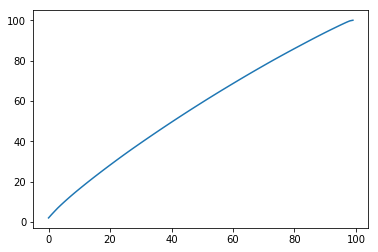

In [91]:
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)
import matplotlib.pyplot as plt

plt.plot(var1)

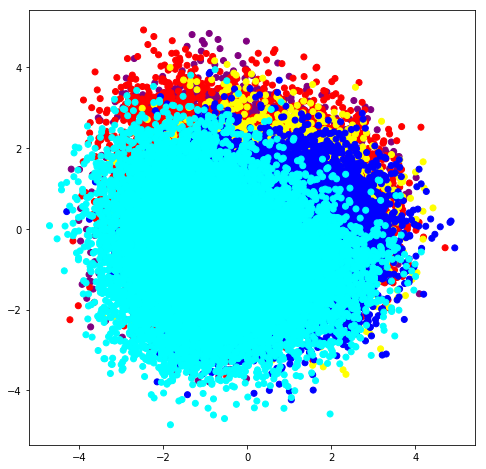

In [145]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from collections import defaultdict
from itertools import count
from functools import partial

color_dict = {'business': 'blue', 'entertainment':'yellow', 'health_&_fitness':'green', 'politics':'red',
       'sports':'purple', 'technology':'cyan'}

label_to_number = defaultdict(partial(next, count(1)))
l = [color_dict[label] for label in labels]

x = Xtrain[:,0]
y = Xtrain[:,1]
label = l
colors = ['red','green','blue','purple','yellow','cyan']

fig = plt.figure(figsize=(8,8))
plt.scatter(x, y, c=l)

In [131]:
l.unique()

AttributeError: 'list' object has no attribute 'unique'

# Evaluating Models

# SVM

In [18]:
from sklearn import svm

from sklearn.metrics import classification_report

svc_clf = svm.SVC(probability = True)
model = svc_clf.fit(x_train, y_train)
y_pred = svc_clf.predict(x_test)
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

        business       0.78      0.77      0.77      3246
   entertainment       0.85      0.86      0.86      1961
health_&_fitness       0.87      0.86      0.86      1970
        politics       0.79      0.77      0.78      2643
          sports       0.90      0.91      0.90      1903
      technology       0.82      0.84      0.83      3293

     avg / total       0.83      0.83      0.83     15016



In [40]:
probs = model.predict_proba(x_test)

In [113]:
test.iloc[32]

0         -0.0914805
1           0.155308
2          -0.289791
3         -0.0896952
4          -0.749752
5           -0.23926
6            0.10121
7           0.903488
8          -0.393258
9           0.496285
10          -0.18179
11         -0.438672
12         -0.206037
13         -0.521323
14          -0.42694
15         -0.194516
16          0.197752
17         0.0773826
18           0.85025
19          0.911968
20         -0.925949
21          0.232575
22          0.166768
23         0.0741749
24          -0.57498
25          -1.11561
26          0.479701
27           1.26361
28           1.26379
29          0.740587
             ...    
71         -0.520657
72        -0.0689728
73          0.354644
74         -0.599868
75        -0.0789573
76         -0.351189
77          0.580945
78           0.20893
79          -1.21433
80          0.999733
81          0.562807
82          0.180849
83         -0.858681
84          0.441467
85          0.831438
86          0.329485
87          0

In [114]:
texts[161]

['@melindafarrell',
 'plenty',
 'fans',
 'taking',
 'advantage',
 'bargain',
 'good',
 'because',
 'day',
 'adelaide',
 'oval',
 'gold',
 'coin',
 'donation',
 'gets']

In [111]:
indices_to_drop = []
for i in range(len(probs)):
    if max(probs[i]) < 0.4:
        indices_to_drop.append(i)

In [112]:
indices_to_drop

[32,
 79,
 167,
 169,
 237,
 301,
 302,
 350,
 360,
 374,
 472,
 526,
 588,
 589,
 655,
 676,
 729,
 757,
 766,
 787,
 797,
 802,
 806,
 812,
 830,
 900,
 987,
 1067,
 1146,
 1174,
 1177,
 1228,
 1232,
 1233,
 1250,
 1326,
 1385,
 1392,
 1453,
 1499,
 1679,
 1783,
 1894,
 1900,
 1975,
 1981,
 2075,
 2082,
 2132,
 2236,
 2251,
 2339,
 2416,
 2589,
 2593,
 2679,
 2704,
 2799,
 2807,
 2836,
 2896,
 2907,
 2941,
 2942,
 2995,
 3020,
 3022,
 3064,
 3076,
 3109,
 3111,
 3149,
 3197,
 3206,
 3212,
 3231,
 3334,
 3344,
 3355,
 3411,
 3427,
 3468,
 3474,
 3476,
 3485,
 3494,
 3512,
 3518,
 3531,
 3650,
 3661,
 3723,
 3738,
 3749,
 3773,
 3779,
 3793,
 3821,
 3822,
 3889,
 3987,
 3989,
 3999,
 4060,
 4131,
 4132,
 4190,
 4225,
 4257,
 4305,
 4406,
 4431,
 4491,
 4522,
 4591,
 4614,
 4621,
 4648,
 4885,
 4892,
 4909,
 4931,
 4968,
 5108,
 5201,
 5226,
 5243,
 5254,
 5261,
 5263,
 5270,
 5321,
 5326,
 5335,
 5346,
 5369,
 5389,
 5418,
 5428,
 5440,
 5474,
 5480,
 5486,
 5537,
 5547,
 5572,
 5607,


# Extra Tree Classifier

In [1292]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(
    bootstrap = False, criterion = 'gini', max_depth = 20, max_features = 30
    
    , min_samples_leaf = 1,\
    min_samples_split =2, n_estimators = 100
    , random_state = 0
#    bootstrap = False, criterion = 'gini', max_depth = 20, max_features = 23, min_samples_leaf = 2, \
#     min_samples_split =8, n_estimators = 20
#     , random_state = 0
#     bootstrap = True, criterion = 'gini', max_depth = 20, max_features = 2,\
#     min_samples_leaf = 14, min_samples_split = 12, n_estimators =70, random_state = 0
)
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)
# for i in range(1,len(y_pred)-1):
#     if y_pred[i-1]== 'normal' and y_pred[i]== 'aggressive' and y_pred[i+1]=='normal':10
#         y_pred[i]='normal'
#     elif y_pred[i-1]== 'aggressive' and y_pred[i]== 'normal' and y_pred[i+1]=='aggressive':
#         y_pred[i]='aggressive'
# print('\n')
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

        business       0.66      0.76      0.71      3215
   entertainment       0.83      0.76      0.79      1819
health_&_fitness       0.89      0.56      0.69      1942
        politics       0.76      0.71      0.74      2547
          sports       0.90      0.80      0.84      1870
      technology       0.68      0.84      0.75      3241

     avg / total       0.76      0.75      0.75     14634



# Gradient Boosting Trees

In [1275]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(n_estimators=50
                                 , learning_rate=1, max_features = 40,
                                 random_state=0).fit(x_train, y_train)
y_pred = GBC.predict(x_test)
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

        business       0.65      0.64      0.64      3215
   entertainment       0.74      0.76      0.75      1819
health_&_fitness       0.76      0.74      0.75      1942
        politics       0.65      0.64      0.65      2547
          sports       0.82      0.83      0.82      1870
      technology       0.71      0.73      0.72      3241

     avg / total       0.71      0.71      0.71     14634



In [47]:
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.preprocessing.label import LabelBinarizer

labelBinarizer = LabelBinarizer()
labelBinarizer.fit_transform(labels)

train_data = x_train
test_data = x_test
train_labels = labelBinarizer.transform([label for label in y_train])
test_labels = labelBinarizer.transform([label for label in y_test])
train_data, test_data, train_labels, test_labels = np.asarray(train_data), np.asarray(test_data), np.asarray(train_labels), np.asarray(test_labels)


In [62]:
model = Sequential()
model.add(Dense(input_dim=100, output_dim=500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(output_dim=1200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(output_dim=400, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(output_dim=600, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(output_dim=train_labels.shape[1], activation='sigmoid'))
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Saves the model with highest score after each training cycle
checkpointer = ModelCheckpoint(verbose=1, save_best_only=True, filepath = 'model/classifier-model.bin')

# Train the neural network
model.fit(train_data, train_labels, validation_data=(test_data, test_labels), batch_size=32, nb_epoch=15, callbacks=[checkpointer])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, activation="relu", units=500)`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1200)`
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=400)`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=600)`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=6)`
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\keras\models.py:

Train on 59108 samples, validate on 15016 samples
Epoch 1/15


12992/59108 [=====>........................] - ETA: 20:25 - loss: 0.6908 - acc: 0.57 - ETA: 7:26 - loss: 0.5650 - acc: 0.7465 - ETA: 4:48 - loss: 0.5286 - acc: 0.781 - ETA: 3:42 - loss: 0.5120 - acc: 0.796 - ETA: 3:06 - loss: 0.5084 - acc: 0.803 - ETA: 2:43 - loss: 0.5018 - acc: 0.809 - ETA: 2:27 - loss: 0.4986 - acc: 0.811 - ETA: 2:15 - loss: 0.4909 - acc: 0.814 - ETA: 2:05 - loss: 0.4860 - acc: 0.816 - ETA: 1:58 - loss: 0.4823 - acc: 0.818 - ETA: 1:52 - loss: 0.4786 - acc: 0.819 - ETA: 1:47 - loss: 0.4757 - acc: 0.820 - ETA: 1:43 - loss: 0.4730 - acc: 0.821 - ETA: 1:39 - loss: 0.4712 - acc: 0.822 - ETA: 1:36 - loss: 0.4688 - acc: 0.823 - ETA: 1:33 - loss: 0.4666 - acc: 0.823 - ETA: 1:31 - loss: 0.4648 - acc: 0.824 - ETA: 1:29 - loss: 0.4614 - acc: 0.824 - ETA: 1:27 - loss: 0.4589 - acc: 0.825 - ETA: 1:25 - loss: 0.4575 - acc: 0.825 - ETA: 1:24 - loss: 0.4546 - acc: 0.826 - ETA: 1:23 - loss: 0.4522 - acc: 0.826 - ETA: 1:22 - loss: 0.4497 - acc: 0.827 - ETA: 1:21 - loss: 0.4457 - acc: 

26688/59108 [============>.................] - ETA: 56s - loss: 0.2718 - acc: 0.88 - ETA: 56s - loss: 0.2717 - acc: 0.88 - ETA: 56s - loss: 0.2714 - acc: 0.88 - ETA: 56s - loss: 0.2712 - acc: 0.89 - ETA: 56s - loss: 0.2707 - acc: 0.89 - ETA: 56s - loss: 0.2701 - acc: 0.89 - ETA: 56s - loss: 0.2698 - acc: 0.89 - ETA: 56s - loss: 0.2694 - acc: 0.89 - ETA: 56s - loss: 0.2693 - acc: 0.89 - ETA: 56s - loss: 0.2691 - acc: 0.89 - ETA: 55s - loss: 0.2686 - acc: 0.89 - ETA: 55s - loss: 0.2688 - acc: 0.89 - ETA: 55s - loss: 0.2687 - acc: 0.89 - ETA: 55s - loss: 0.2682 - acc: 0.89 - ETA: 55s - loss: 0.2678 - acc: 0.89 - ETA: 55s - loss: 0.2673 - acc: 0.89 - ETA: 55s - loss: 0.2668 - acc: 0.89 - ETA: 55s - loss: 0.2666 - acc: 0.89 - ETA: 55s - loss: 0.2665 - acc: 0.89 - ETA: 55s - loss: 0.2663 - acc: 0.89 - ETA: 55s - loss: 0.2661 - acc: 0.89 - ETA: 55s - loss: 0.2661 - acc: 0.89 - ETA: 54s - loss: 0.2658 - acc: 0.89 - ETA: 54s - loss: 0.2656 - acc: 0.89 - ETA: 54s - loss: 0.2651 - acc: 0.89 - ETA

40320/59108 [===================>..........] - ETA: 39s - loss: 0.2357 - acc: 0.90 - ETA: 39s - loss: 0.2356 - acc: 0.90 - ETA: 39s - loss: 0.2355 - acc: 0.90 - ETA: 39s - loss: 0.2354 - acc: 0.90 - ETA: 39s - loss: 0.2354 - acc: 0.90 - ETA: 39s - loss: 0.2353 - acc: 0.90 - ETA: 39s - loss: 0.2352 - acc: 0.90 - ETA: 38s - loss: 0.2352 - acc: 0.90 - ETA: 38s - loss: 0.2350 - acc: 0.90 - ETA: 38s - loss: 0.2349 - acc: 0.90 - ETA: 38s - loss: 0.2347 - acc: 0.90 - ETA: 38s - loss: 0.2346 - acc: 0.90 - ETA: 38s - loss: 0.2346 - acc: 0.90 - ETA: 38s - loss: 0.2345 - acc: 0.90 - ETA: 38s - loss: 0.2345 - acc: 0.90 - ETA: 38s - loss: 0.2343 - acc: 0.90 - ETA: 38s - loss: 0.2341 - acc: 0.90 - ETA: 38s - loss: 0.2340 - acc: 0.90 - ETA: 38s - loss: 0.2338 - acc: 0.90 - ETA: 38s - loss: 0.2338 - acc: 0.90 - ETA: 37s - loss: 0.2338 - acc: 0.90 - ETA: 37s - loss: 0.2338 - acc: 0.90 - ETA: 37s - loss: 0.2337 - acc: 0.90 - ETA: 37s - loss: 0.2336 - acc: 0.90 - ETA: 37s - loss: 0.2335 - acc: 0.90 - ETA

54080/59108 [==========================>...] - ETA: 22s - loss: 0.2199 - acc: 0.91 - ETA: 22s - loss: 0.2198 - acc: 0.91 - ETA: 22s - loss: 0.2197 - acc: 0.91 - ETA: 22s - loss: 0.2197 - acc: 0.91 - ETA: 22s - loss: 0.2196 - acc: 0.91 - ETA: 22s - loss: 0.2196 - acc: 0.91 - ETA: 22s - loss: 0.2195 - acc: 0.91 - ETA: 22s - loss: 0.2194 - acc: 0.91 - ETA: 22s - loss: 0.2194 - acc: 0.91 - ETA: 22s - loss: 0.2194 - acc: 0.91 - ETA: 22s - loss: 0.2193 - acc: 0.91 - ETA: 21s - loss: 0.2193 - acc: 0.91 - ETA: 21s - loss: 0.2192 - acc: 0.91 - ETA: 21s - loss: 0.2191 - acc: 0.91 - ETA: 21s - loss: 0.2191 - acc: 0.91 - ETA: 21s - loss: 0.2191 - acc: 0.91 - ETA: 21s - loss: 0.2190 - acc: 0.91 - ETA: 21s - loss: 0.2189 - acc: 0.91 - ETA: 21s - loss: 0.2188 - acc: 0.91 - ETA: 21s - loss: 0.2187 - acc: 0.91 - ETA: 21s - loss: 0.2187 - acc: 0.91 - ETA: 21s - loss: 0.2187 - acc: 0.91 - ETA: 21s - loss: 0.2186 - acc: 0.91 - ETA: 21s - loss: 0.2185 - acc: 0.91 - ETA: 20s - loss: 0.2185 - acc: 0.91 - ETA

59108/59108 [==============================] - 74s 1ms/step - loss: 0.2049 - acc: 0.9189 - val_loss: 0.1482 - val_acc: 0.9418
Epoch 2/15


13408/59108 [=====>........................] - ETA: 59s - loss: 0.1458 - acc: 0.95 - ETA: 1:02 - loss: 0.1849 - acc: 0.927 - ETA: 1:00 - loss: 0.1740 - acc: 0.931 - ETA: 1:00 - loss: 0.1690 - acc: 0.936 - ETA: 59s - loss: 0.1697 - acc: 0.934 - ETA: 58s - loss: 0.1683 - acc: 0.93 - ETA: 58s - loss: 0.1636 - acc: 0.93 - ETA: 57s - loss: 0.1631 - acc: 0.93 - ETA: 57s - loss: 0.1622 - acc: 0.93 - ETA: 57s - loss: 0.1563 - acc: 0.94 - ETA: 57s - loss: 0.1588 - acc: 0.94 - ETA: 57s - loss: 0.1602 - acc: 0.93 - ETA: 57s - loss: 0.1597 - acc: 0.93 - ETA: 57s - loss: 0.1582 - acc: 0.93 - ETA: 57s - loss: 0.1558 - acc: 0.94 - ETA: 57s - loss: 0.1585 - acc: 0.93 - ETA: 57s - loss: 0.1618 - acc: 0.93 - ETA: 57s - loss: 0.1627 - acc: 0.93 - ETA: 57s - loss: 0.1616 - acc: 0.93 - ETA: 57s - loss: 0.1585 - acc: 0.93 - ETA: 57s - loss: 0.1583 - acc: 0.93 - ETA: 57s - loss: 0.1587 - acc: 0.93 - ETA: 58s - loss: 0.1595 - acc: 0.93 - ETA: 58s - loss: 0.1580 - acc: 0.93 - ETA: 58s - loss: 0.1573 - acc: 0.9

27136/59108 [============>.................] - ETA: 54s - loss: 0.1533 - acc: 0.94 - ETA: 53s - loss: 0.1534 - acc: 0.94 - ETA: 53s - loss: 0.1535 - acc: 0.94 - ETA: 53s - loss: 0.1534 - acc: 0.94 - ETA: 53s - loss: 0.1532 - acc: 0.94 - ETA: 53s - loss: 0.1530 - acc: 0.94 - ETA: 53s - loss: 0.1529 - acc: 0.94 - ETA: 53s - loss: 0.1528 - acc: 0.94 - ETA: 53s - loss: 0.1528 - acc: 0.94 - ETA: 53s - loss: 0.1525 - acc: 0.94 - ETA: 53s - loss: 0.1525 - acc: 0.94 - ETA: 53s - loss: 0.1526 - acc: 0.94 - ETA: 53s - loss: 0.1525 - acc: 0.94 - ETA: 53s - loss: 0.1524 - acc: 0.94 - ETA: 53s - loss: 0.1524 - acc: 0.94 - ETA: 52s - loss: 0.1524 - acc: 0.94 - ETA: 52s - loss: 0.1523 - acc: 0.94 - ETA: 52s - loss: 0.1524 - acc: 0.94 - ETA: 52s - loss: 0.1523 - acc: 0.94 - ETA: 52s - loss: 0.1520 - acc: 0.94 - ETA: 52s - loss: 0.1521 - acc: 0.94 - ETA: 52s - loss: 0.1520 - acc: 0.94 - ETA: 52s - loss: 0.1520 - acc: 0.94 - ETA: 52s - loss: 0.1517 - acc: 0.94 - ETA: 52s - loss: 0.1517 - acc: 0.94 - ETA

40864/59108 [===================>..........] - ETA: 38s - loss: 0.1496 - acc: 0.94 - ETA: 38s - loss: 0.1497 - acc: 0.94 - ETA: 38s - loss: 0.1497 - acc: 0.94 - ETA: 37s - loss: 0.1498 - acc: 0.94 - ETA: 37s - loss: 0.1497 - acc: 0.94 - ETA: 37s - loss: 0.1498 - acc: 0.94 - ETA: 37s - loss: 0.1498 - acc: 0.94 - ETA: 37s - loss: 0.1497 - acc: 0.94 - ETA: 37s - loss: 0.1499 - acc: 0.94 - ETA: 37s - loss: 0.1499 - acc: 0.94 - ETA: 37s - loss: 0.1499 - acc: 0.94 - ETA: 37s - loss: 0.1500 - acc: 0.94 - ETA: 37s - loss: 0.1499 - acc: 0.94 - ETA: 37s - loss: 0.1499 - acc: 0.94 - ETA: 37s - loss: 0.1498 - acc: 0.94 - ETA: 37s - loss: 0.1498 - acc: 0.94 - ETA: 37s - loss: 0.1498 - acc: 0.94 - ETA: 36s - loss: 0.1498 - acc: 0.94 - ETA: 36s - loss: 0.1499 - acc: 0.94 - ETA: 36s - loss: 0.1500 - acc: 0.94 - ETA: 36s - loss: 0.1501 - acc: 0.94 - ETA: 36s - loss: 0.1500 - acc: 0.94 - ETA: 36s - loss: 0.1499 - acc: 0.94 - ETA: 36s - loss: 0.1498 - acc: 0.94 - ETA: 36s - loss: 0.1498 - acc: 0.94 - ETA

54528/59108 [==========================>...] - ETA: 21s - loss: 0.1485 - acc: 0.94 - ETA: 21s - loss: 0.1486 - acc: 0.94 - ETA: 21s - loss: 0.1486 - acc: 0.94 - ETA: 21s - loss: 0.1486 - acc: 0.94 - ETA: 21s - loss: 0.1486 - acc: 0.94 - ETA: 21s - loss: 0.1485 - acc: 0.94 - ETA: 21s - loss: 0.1485 - acc: 0.94 - ETA: 21s - loss: 0.1485 - acc: 0.94 - ETA: 21s - loss: 0.1486 - acc: 0.94 - ETA: 21s - loss: 0.1486 - acc: 0.94 - ETA: 21s - loss: 0.1486 - acc: 0.94 - ETA: 20s - loss: 0.1486 - acc: 0.94 - ETA: 20s - loss: 0.1486 - acc: 0.94 - ETA: 20s - loss: 0.1486 - acc: 0.94 - ETA: 20s - loss: 0.1486 - acc: 0.94 - ETA: 20s - loss: 0.1486 - acc: 0.94 - ETA: 20s - loss: 0.1485 - acc: 0.94 - ETA: 20s - loss: 0.1486 - acc: 0.94 - ETA: 20s - loss: 0.1487 - acc: 0.94 - ETA: 20s - loss: 0.1486 - acc: 0.94 - ETA: 20s - loss: 0.1486 - acc: 0.94 - ETA: 20s - loss: 0.1486 - acc: 0.94 - ETA: 20s - loss: 0.1486 - acc: 0.94 - ETA: 20s - loss: 0.1487 - acc: 0.94 - ETA: 19s - loss: 0.1487 - acc: 0.94 - ETA

59108/59108 [==============================] - 73s 1ms/step - loss: 0.1490 - acc: 0.9425 - val_loss: 0.1325 - val_acc: 0.9483
Epoch 3/15


13472/59108 [=====>........................] - ETA: 59s - loss: 0.0899 - acc: 0.96 - ETA: 56s - loss: 0.0910 - acc: 0.96 - ETA: 55s - loss: 0.0985 - acc: 0.96 - ETA: 55s - loss: 0.1192 - acc: 0.95 - ETA: 55s - loss: 0.1169 - acc: 0.95 - ETA: 56s - loss: 0.1181 - acc: 0.95 - ETA: 56s - loss: 0.1211 - acc: 0.95 - ETA: 56s - loss: 0.1247 - acc: 0.95 - ETA: 57s - loss: 0.1204 - acc: 0.95 - ETA: 57s - loss: 0.1155 - acc: 0.95 - ETA: 57s - loss: 0.1162 - acc: 0.95 - ETA: 57s - loss: 0.1140 - acc: 0.95 - ETA: 57s - loss: 0.1157 - acc: 0.95 - ETA: 56s - loss: 0.1159 - acc: 0.95 - ETA: 56s - loss: 0.1144 - acc: 0.95 - ETA: 56s - loss: 0.1134 - acc: 0.95 - ETA: 56s - loss: 0.1155 - acc: 0.95 - ETA: 56s - loss: 0.1147 - acc: 0.95 - ETA: 56s - loss: 0.1131 - acc: 0.95 - ETA: 56s - loss: 0.1136 - acc: 0.95 - ETA: 56s - loss: 0.1158 - acc: 0.95 - ETA: 56s - loss: 0.1154 - acc: 0.95 - ETA: 56s - loss: 0.1179 - acc: 0.95 - ETA: 56s - loss: 0.1179 - acc: 0.95 - ETA: 57s - loss: 0.1197 - acc: 0.95 - ETA

27232/59108 [============>.................] - ETA: 53s - loss: 0.1294 - acc: 0.95 - ETA: 53s - loss: 0.1293 - acc: 0.95 - ETA: 53s - loss: 0.1291 - acc: 0.95 - ETA: 53s - loss: 0.1291 - acc: 0.95 - ETA: 53s - loss: 0.1289 - acc: 0.95 - ETA: 53s - loss: 0.1286 - acc: 0.95 - ETA: 53s - loss: 0.1285 - acc: 0.95 - ETA: 53s - loss: 0.1288 - acc: 0.95 - ETA: 53s - loss: 0.1287 - acc: 0.95 - ETA: 53s - loss: 0.1288 - acc: 0.95 - ETA: 52s - loss: 0.1288 - acc: 0.95 - ETA: 52s - loss: 0.1288 - acc: 0.95 - ETA: 52s - loss: 0.1288 - acc: 0.95 - ETA: 52s - loss: 0.1289 - acc: 0.95 - ETA: 52s - loss: 0.1289 - acc: 0.95 - ETA: 52s - loss: 0.1287 - acc: 0.95 - ETA: 52s - loss: 0.1287 - acc: 0.95 - ETA: 52s - loss: 0.1288 - acc: 0.95 - ETA: 52s - loss: 0.1290 - acc: 0.95 - ETA: 52s - loss: 0.1290 - acc: 0.95 - ETA: 52s - loss: 0.1293 - acc: 0.95 - ETA: 52s - loss: 0.1294 - acc: 0.95 - ETA: 52s - loss: 0.1293 - acc: 0.95 - ETA: 51s - loss: 0.1295 - acc: 0.95 - ETA: 51s - loss: 0.1295 - acc: 0.95 - ETA

40960/59108 [===================>..........] - ETA: 37s - loss: 0.1289 - acc: 0.95 - ETA: 37s - loss: 0.1290 - acc: 0.95 - ETA: 37s - loss: 0.1290 - acc: 0.95 - ETA: 37s - loss: 0.1289 - acc: 0.95 - ETA: 37s - loss: 0.1290 - acc: 0.95 - ETA: 37s - loss: 0.1289 - acc: 0.95 - ETA: 37s - loss: 0.1289 - acc: 0.95 - ETA: 37s - loss: 0.1288 - acc: 0.95 - ETA: 37s - loss: 0.1288 - acc: 0.95 - ETA: 37s - loss: 0.1288 - acc: 0.95 - ETA: 37s - loss: 0.1289 - acc: 0.95 - ETA: 36s - loss: 0.1289 - acc: 0.95 - ETA: 36s - loss: 0.1289 - acc: 0.95 - ETA: 36s - loss: 0.1290 - acc: 0.95 - ETA: 36s - loss: 0.1289 - acc: 0.95 - ETA: 36s - loss: 0.1290 - acc: 0.95 - ETA: 36s - loss: 0.1290 - acc: 0.95 - ETA: 36s - loss: 0.1291 - acc: 0.95 - ETA: 36s - loss: 0.1291 - acc: 0.95 - ETA: 36s - loss: 0.1292 - acc: 0.95 - ETA: 36s - loss: 0.1292 - acc: 0.95 - ETA: 36s - loss: 0.1293 - acc: 0.95 - ETA: 36s - loss: 0.1293 - acc: 0.95 - ETA: 36s - loss: 0.1292 - acc: 0.95 - ETA: 35s - loss: 0.1293 - acc: 0.95 - ETA

54656/59108 [==========================>...] - ETA: 21s - loss: 0.1297 - acc: 0.95 - ETA: 21s - loss: 0.1297 - acc: 0.95 - ETA: 21s - loss: 0.1297 - acc: 0.95 - ETA: 21s - loss: 0.1297 - acc: 0.95 - ETA: 20s - loss: 0.1297 - acc: 0.95 - ETA: 20s - loss: 0.1296 - acc: 0.95 - ETA: 20s - loss: 0.1296 - acc: 0.95 - ETA: 20s - loss: 0.1296 - acc: 0.95 - ETA: 20s - loss: 0.1296 - acc: 0.95 - ETA: 20s - loss: 0.1296 - acc: 0.95 - ETA: 20s - loss: 0.1296 - acc: 0.95 - ETA: 20s - loss: 0.1297 - acc: 0.95 - ETA: 20s - loss: 0.1297 - acc: 0.95 - ETA: 20s - loss: 0.1297 - acc: 0.95 - ETA: 20s - loss: 0.1297 - acc: 0.95 - ETA: 20s - loss: 0.1297 - acc: 0.95 - ETA: 20s - loss: 0.1297 - acc: 0.95 - ETA: 19s - loss: 0.1297 - acc: 0.95 - ETA: 19s - loss: 0.1296 - acc: 0.95 - ETA: 19s - loss: 0.1296 - acc: 0.95 - ETA: 19s - loss: 0.1295 - acc: 0.95 - ETA: 19s - loss: 0.1295 - acc: 0.95 - ETA: 19s - loss: 0.1295 - acc: 0.95 - ETA: 19s - loss: 0.1294 - acc: 0.95 - ETA: 19s - loss: 0.1294 - acc: 0.95 - ETA

59108/59108 [==============================] - 72s 1ms/step - loss: 0.1294 - acc: 0.9510 - val_loss: 0.1258 - val_acc: 0.9510
Epoch 4/15


13408/59108 [=====>........................] - ETA: 57s - loss: 0.1914 - acc: 0.91 - ETA: 54s - loss: 0.0952 - acc: 0.96 - ETA: 56s - loss: 0.1120 - acc: 0.95 - ETA: 56s - loss: 0.1001 - acc: 0.96 - ETA: 56s - loss: 0.1023 - acc: 0.96 - ETA: 55s - loss: 0.1003 - acc: 0.96 - ETA: 55s - loss: 0.1006 - acc: 0.96 - ETA: 56s - loss: 0.1028 - acc: 0.96 - ETA: 56s - loss: 0.1039 - acc: 0.96 - ETA: 56s - loss: 0.0982 - acc: 0.96 - ETA: 56s - loss: 0.0975 - acc: 0.96 - ETA: 56s - loss: 0.1004 - acc: 0.96 - ETA: 55s - loss: 0.1020 - acc: 0.96 - ETA: 56s - loss: 0.1042 - acc: 0.96 - ETA: 55s - loss: 0.1035 - acc: 0.96 - ETA: 55s - loss: 0.1030 - acc: 0.96 - ETA: 55s - loss: 0.1032 - acc: 0.96 - ETA: 55s - loss: 0.1045 - acc: 0.96 - ETA: 55s - loss: 0.1042 - acc: 0.96 - ETA: 56s - loss: 0.1065 - acc: 0.96 - ETA: 56s - loss: 0.1077 - acc: 0.96 - ETA: 56s - loss: 0.1070 - acc: 0.96 - ETA: 56s - loss: 0.1070 - acc: 0.96 - ETA: 57s - loss: 0.1073 - acc: 0.96 - ETA: 57s - loss: 0.1083 - acc: 0.95 - ETA

27168/59108 [============>.................] - ETA: 54s - loss: 0.1097 - acc: 0.95 - ETA: 53s - loss: 0.1096 - acc: 0.95 - ETA: 53s - loss: 0.1094 - acc: 0.95 - ETA: 53s - loss: 0.1093 - acc: 0.95 - ETA: 53s - loss: 0.1092 - acc: 0.95 - ETA: 53s - loss: 0.1096 - acc: 0.95 - ETA: 53s - loss: 0.1097 - acc: 0.95 - ETA: 53s - loss: 0.1095 - acc: 0.95 - ETA: 53s - loss: 0.1093 - acc: 0.95 - ETA: 53s - loss: 0.1090 - acc: 0.95 - ETA: 53s - loss: 0.1090 - acc: 0.95 - ETA: 53s - loss: 0.1095 - acc: 0.95 - ETA: 53s - loss: 0.1095 - acc: 0.95 - ETA: 53s - loss: 0.1093 - acc: 0.95 - ETA: 53s - loss: 0.1094 - acc: 0.95 - ETA: 52s - loss: 0.1095 - acc: 0.95 - ETA: 52s - loss: 0.1099 - acc: 0.95 - ETA: 52s - loss: 0.1098 - acc: 0.95 - ETA: 52s - loss: 0.1100 - acc: 0.95 - ETA: 52s - loss: 0.1098 - acc: 0.95 - ETA: 52s - loss: 0.1098 - acc: 0.95 - ETA: 52s - loss: 0.1100 - acc: 0.95 - ETA: 52s - loss: 0.1099 - acc: 0.95 - ETA: 52s - loss: 0.1099 - acc: 0.95 - ETA: 52s - loss: 0.1099 - acc: 0.95 - ETA

40896/59108 [===================>..........] - ETA: 38s - loss: 0.1118 - acc: 0.95 - ETA: 38s - loss: 0.1118 - acc: 0.95 - ETA: 37s - loss: 0.1118 - acc: 0.95 - ETA: 37s - loss: 0.1118 - acc: 0.95 - ETA: 37s - loss: 0.1117 - acc: 0.95 - ETA: 37s - loss: 0.1117 - acc: 0.95 - ETA: 37s - loss: 0.1117 - acc: 0.95 - ETA: 37s - loss: 0.1116 - acc: 0.95 - ETA: 37s - loss: 0.1118 - acc: 0.95 - ETA: 37s - loss: 0.1119 - acc: 0.95 - ETA: 37s - loss: 0.1119 - acc: 0.95 - ETA: 37s - loss: 0.1118 - acc: 0.95 - ETA: 37s - loss: 0.1117 - acc: 0.95 - ETA: 37s - loss: 0.1116 - acc: 0.95 - ETA: 37s - loss: 0.1116 - acc: 0.95 - ETA: 37s - loss: 0.1118 - acc: 0.95 - ETA: 36s - loss: 0.1118 - acc: 0.95 - ETA: 36s - loss: 0.1117 - acc: 0.95 - ETA: 36s - loss: 0.1118 - acc: 0.95 - ETA: 36s - loss: 0.1119 - acc: 0.95 - ETA: 36s - loss: 0.1120 - acc: 0.95 - ETA: 36s - loss: 0.1119 - acc: 0.95 - ETA: 36s - loss: 0.1119 - acc: 0.95 - ETA: 36s - loss: 0.1118 - acc: 0.95 - ETA: 36s - loss: 0.1118 - acc: 0.95 - ETA

54624/59108 [==========================>...] - ETA: 21s - loss: 0.1135 - acc: 0.95 - ETA: 21s - loss: 0.1135 - acc: 0.95 - ETA: 21s - loss: 0.1135 - acc: 0.95 - ETA: 21s - loss: 0.1135 - acc: 0.95 - ETA: 21s - loss: 0.1135 - acc: 0.95 - ETA: 21s - loss: 0.1135 - acc: 0.95 - ETA: 21s - loss: 0.1135 - acc: 0.95 - ETA: 21s - loss: 0.1135 - acc: 0.95 - ETA: 21s - loss: 0.1136 - acc: 0.95 - ETA: 21s - loss: 0.1136 - acc: 0.95 - ETA: 20s - loss: 0.1136 - acc: 0.95 - ETA: 20s - loss: 0.1135 - acc: 0.95 - ETA: 20s - loss: 0.1135 - acc: 0.95 - ETA: 20s - loss: 0.1135 - acc: 0.95 - ETA: 20s - loss: 0.1135 - acc: 0.95 - ETA: 20s - loss: 0.1136 - acc: 0.95 - ETA: 20s - loss: 0.1135 - acc: 0.95 - ETA: 20s - loss: 0.1135 - acc: 0.95 - ETA: 20s - loss: 0.1135 - acc: 0.95 - ETA: 20s - loss: 0.1135 - acc: 0.95 - ETA: 20s - loss: 0.1136 - acc: 0.95 - ETA: 20s - loss: 0.1136 - acc: 0.95 - ETA: 20s - loss: 0.1136 - acc: 0.95 - ETA: 20s - loss: 0.1136 - acc: 0.95 - ETA: 19s - loss: 0.1136 - acc: 0.95 - ETA

59108/59108 [==============================] - 73s 1ms/step - loss: 0.1160 - acc: 0.9562 - val_loss: 0.1212 - val_acc: 0.9539
Epoch 5/15


13408/59108 [=====>........................] - ETA: 1:01 - loss: 0.1442 - acc: 0.958 - ETA: 56s - loss: 0.1062 - acc: 0.965 - ETA: 55s - loss: 0.0916 - acc: 0.96 - ETA: 56s - loss: 0.0922 - acc: 0.96 - ETA: 56s - loss: 0.0811 - acc: 0.97 - ETA: 57s - loss: 0.0900 - acc: 0.96 - ETA: 56s - loss: 0.0877 - acc: 0.96 - ETA: 56s - loss: 0.0925 - acc: 0.96 - ETA: 56s - loss: 0.0942 - acc: 0.96 - ETA: 56s - loss: 0.0985 - acc: 0.96 - ETA: 56s - loss: 0.1016 - acc: 0.96 - ETA: 56s - loss: 0.1002 - acc: 0.96 - ETA: 56s - loss: 0.0989 - acc: 0.96 - ETA: 56s - loss: 0.0999 - acc: 0.96 - ETA: 56s - loss: 0.0981 - acc: 0.96 - ETA: 56s - loss: 0.0960 - acc: 0.96 - ETA: 56s - loss: 0.0967 - acc: 0.96 - ETA: 56s - loss: 0.0955 - acc: 0.96 - ETA: 56s - loss: 0.0928 - acc: 0.96 - ETA: 56s - loss: 0.0920 - acc: 0.96 - ETA: 56s - loss: 0.0941 - acc: 0.96 - ETA: 56s - loss: 0.0941 - acc: 0.96 - ETA: 56s - loss: 0.0960 - acc: 0.96 - ETA: 57s - loss: 0.0961 - acc: 0.96 - ETA: 57s - loss: 0.0957 - acc: 0.96 - 

27168/59108 [============>.................] - ETA: 54s - loss: 0.1005 - acc: 0.96 - ETA: 53s - loss: 0.1005 - acc: 0.96 - ETA: 53s - loss: 0.1005 - acc: 0.96 - ETA: 53s - loss: 0.1005 - acc: 0.96 - ETA: 53s - loss: 0.1007 - acc: 0.96 - ETA: 53s - loss: 0.1006 - acc: 0.96 - ETA: 53s - loss: 0.1006 - acc: 0.96 - ETA: 53s - loss: 0.1008 - acc: 0.96 - ETA: 53s - loss: 0.1007 - acc: 0.96 - ETA: 53s - loss: 0.1004 - acc: 0.96 - ETA: 53s - loss: 0.1006 - acc: 0.96 - ETA: 53s - loss: 0.1005 - acc: 0.96 - ETA: 53s - loss: 0.1007 - acc: 0.96 - ETA: 53s - loss: 0.1007 - acc: 0.96 - ETA: 53s - loss: 0.1010 - acc: 0.96 - ETA: 52s - loss: 0.1013 - acc: 0.96 - ETA: 52s - loss: 0.1012 - acc: 0.96 - ETA: 52s - loss: 0.1011 - acc: 0.96 - ETA: 52s - loss: 0.1013 - acc: 0.96 - ETA: 52s - loss: 0.1013 - acc: 0.96 - ETA: 52s - loss: 0.1012 - acc: 0.96 - ETA: 52s - loss: 0.1011 - acc: 0.96 - ETA: 52s - loss: 0.1010 - acc: 0.96 - ETA: 52s - loss: 0.1012 - acc: 0.96 - ETA: 52s - loss: 0.1012 - acc: 0.96 - ETA

40928/59108 [===================>..........] - ETA: 38s - loss: 0.1033 - acc: 0.96 - ETA: 37s - loss: 0.1033 - acc: 0.96 - ETA: 37s - loss: 0.1033 - acc: 0.96 - ETA: 37s - loss: 0.1033 - acc: 0.96 - ETA: 37s - loss: 0.1033 - acc: 0.96 - ETA: 37s - loss: 0.1032 - acc: 0.96 - ETA: 37s - loss: 0.1033 - acc: 0.96 - ETA: 37s - loss: 0.1032 - acc: 0.96 - ETA: 37s - loss: 0.1033 - acc: 0.96 - ETA: 37s - loss: 0.1033 - acc: 0.96 - ETA: 37s - loss: 0.1034 - acc: 0.96 - ETA: 37s - loss: 0.1034 - acc: 0.96 - ETA: 37s - loss: 0.1034 - acc: 0.96 - ETA: 37s - loss: 0.1035 - acc: 0.96 - ETA: 37s - loss: 0.1035 - acc: 0.96 - ETA: 36s - loss: 0.1034 - acc: 0.96 - ETA: 36s - loss: 0.1033 - acc: 0.96 - ETA: 36s - loss: 0.1032 - acc: 0.96 - ETA: 36s - loss: 0.1032 - acc: 0.96 - ETA: 36s - loss: 0.1032 - acc: 0.96 - ETA: 36s - loss: 0.1032 - acc: 0.96 - ETA: 36s - loss: 0.1033 - acc: 0.96 - ETA: 36s - loss: 0.1034 - acc: 0.96 - ETA: 36s - loss: 0.1033 - acc: 0.96 - ETA: 36s - loss: 0.1035 - acc: 0.96 - ETA

54656/59108 [==========================>...] - ETA: 21s - loss: 0.1053 - acc: 0.96 - ETA: 21s - loss: 0.1053 - acc: 0.96 - ETA: 21s - loss: 0.1052 - acc: 0.96 - ETA: 21s - loss: 0.1052 - acc: 0.96 - ETA: 21s - loss: 0.1053 - acc: 0.96 - ETA: 21s - loss: 0.1054 - acc: 0.96 - ETA: 21s - loss: 0.1054 - acc: 0.96 - ETA: 21s - loss: 0.1054 - acc: 0.96 - ETA: 21s - loss: 0.1054 - acc: 0.96 - ETA: 20s - loss: 0.1054 - acc: 0.96 - ETA: 20s - loss: 0.1055 - acc: 0.96 - ETA: 20s - loss: 0.1055 - acc: 0.96 - ETA: 20s - loss: 0.1055 - acc: 0.96 - ETA: 20s - loss: 0.1054 - acc: 0.96 - ETA: 20s - loss: 0.1053 - acc: 0.96 - ETA: 20s - loss: 0.1053 - acc: 0.96 - ETA: 20s - loss: 0.1054 - acc: 0.96 - ETA: 20s - loss: 0.1053 - acc: 0.96 - ETA: 20s - loss: 0.1053 - acc: 0.96 - ETA: 20s - loss: 0.1053 - acc: 0.96 - ETA: 20s - loss: 0.1053 - acc: 0.96 - ETA: 20s - loss: 0.1053 - acc: 0.96 - ETA: 20s - loss: 0.1054 - acc: 0.96 - ETA: 19s - loss: 0.1054 - acc: 0.96 - ETA: 19s - loss: 0.1055 - acc: 0.96 - ETA

59108/59108 [==============================] - 74s 1ms/step - loss: 0.1067 - acc: 0.9599 - val_loss: 0.1175 - val_acc: 0.9551
Epoch 6/15


13248/59108 [=====>........................] - ETA: 59s - loss: 0.0584 - acc: 0.97 - ETA: 56s - loss: 0.1130 - acc: 0.95 - ETA: 57s - loss: 0.1038 - acc: 0.96 - ETA: 58s - loss: 0.0936 - acc: 0.96 - ETA: 57s - loss: 0.0943 - acc: 0.96 - ETA: 57s - loss: 0.0942 - acc: 0.96 - ETA: 57s - loss: 0.0944 - acc: 0.96 - ETA: 58s - loss: 0.0918 - acc: 0.96 - ETA: 57s - loss: 0.0918 - acc: 0.96 - ETA: 58s - loss: 0.0872 - acc: 0.96 - ETA: 58s - loss: 0.0847 - acc: 0.96 - ETA: 58s - loss: 0.0843 - acc: 0.96 - ETA: 57s - loss: 0.0851 - acc: 0.96 - ETA: 57s - loss: 0.0829 - acc: 0.96 - ETA: 57s - loss: 0.0824 - acc: 0.96 - ETA: 57s - loss: 0.0815 - acc: 0.96 - ETA: 57s - loss: 0.0828 - acc: 0.96 - ETA: 57s - loss: 0.0834 - acc: 0.96 - ETA: 57s - loss: 0.0858 - acc: 0.96 - ETA: 57s - loss: 0.0907 - acc: 0.96 - ETA: 57s - loss: 0.0917 - acc: 0.96 - ETA: 57s - loss: 0.0916 - acc: 0.96 - ETA: 57s - loss: 0.0897 - acc: 0.96 - ETA: 58s - loss: 0.0906 - acc: 0.96 - ETA: 58s - loss: 0.0893 - acc: 0.96 - ETA

26944/59108 [============>.................] - ETA: 55s - loss: 0.0901 - acc: 0.96 - ETA: 55s - loss: 0.0904 - acc: 0.96 - ETA: 55s - loss: 0.0906 - acc: 0.96 - ETA: 55s - loss: 0.0906 - acc: 0.96 - ETA: 55s - loss: 0.0907 - acc: 0.96 - ETA: 54s - loss: 0.0909 - acc: 0.96 - ETA: 54s - loss: 0.0912 - acc: 0.96 - ETA: 54s - loss: 0.0911 - acc: 0.96 - ETA: 54s - loss: 0.0912 - acc: 0.96 - ETA: 54s - loss: 0.0913 - acc: 0.96 - ETA: 54s - loss: 0.0910 - acc: 0.96 - ETA: 54s - loss: 0.0911 - acc: 0.96 - ETA: 54s - loss: 0.0911 - acc: 0.96 - ETA: 54s - loss: 0.0912 - acc: 0.96 - ETA: 54s - loss: 0.0911 - acc: 0.96 - ETA: 54s - loss: 0.0911 - acc: 0.96 - ETA: 54s - loss: 0.0912 - acc: 0.96 - ETA: 54s - loss: 0.0912 - acc: 0.96 - ETA: 53s - loss: 0.0912 - acc: 0.96 - ETA: 53s - loss: 0.0912 - acc: 0.96 - ETA: 53s - loss: 0.0912 - acc: 0.96 - ETA: 53s - loss: 0.0913 - acc: 0.96 - ETA: 53s - loss: 0.0913 - acc: 0.96 - ETA: 53s - loss: 0.0913 - acc: 0.96 - ETA: 53s - loss: 0.0913 - acc: 0.96 - ETA

40576/59108 [===================>..........] - ETA: 39s - loss: 0.0948 - acc: 0.96 - ETA: 39s - loss: 0.0948 - acc: 0.96 - ETA: 38s - loss: 0.0948 - acc: 0.96 - ETA: 38s - loss: 0.0948 - acc: 0.96 - ETA: 38s - loss: 0.0948 - acc: 0.96 - ETA: 38s - loss: 0.0947 - acc: 0.96 - ETA: 38s - loss: 0.0947 - acc: 0.96 - ETA: 38s - loss: 0.0946 - acc: 0.96 - ETA: 38s - loss: 0.0946 - acc: 0.96 - ETA: 38s - loss: 0.0946 - acc: 0.96 - ETA: 38s - loss: 0.0947 - acc: 0.96 - ETA: 38s - loss: 0.0947 - acc: 0.96 - ETA: 38s - loss: 0.0947 - acc: 0.96 - ETA: 38s - loss: 0.0948 - acc: 0.96 - ETA: 37s - loss: 0.0947 - acc: 0.96 - ETA: 37s - loss: 0.0947 - acc: 0.96 - ETA: 37s - loss: 0.0947 - acc: 0.96 - ETA: 37s - loss: 0.0947 - acc: 0.96 - ETA: 37s - loss: 0.0946 - acc: 0.96 - ETA: 37s - loss: 0.0946 - acc: 0.96 - ETA: 37s - loss: 0.0945 - acc: 0.96 - ETA: 37s - loss: 0.0946 - acc: 0.96 - ETA: 37s - loss: 0.0946 - acc: 0.96 - ETA: 37s - loss: 0.0947 - acc: 0.96 - ETA: 37s - loss: 0.0946 - acc: 0.96 - ETA

54336/59108 [==========================>...] - ETA: 22s - loss: 0.0964 - acc: 0.96 - ETA: 22s - loss: 0.0964 - acc: 0.96 - ETA: 22s - loss: 0.0966 - acc: 0.96 - ETA: 22s - loss: 0.0966 - acc: 0.96 - ETA: 22s - loss: 0.0966 - acc: 0.96 - ETA: 22s - loss: 0.0965 - acc: 0.96 - ETA: 21s - loss: 0.0965 - acc: 0.96 - ETA: 21s - loss: 0.0965 - acc: 0.96 - ETA: 21s - loss: 0.0966 - acc: 0.96 - ETA: 21s - loss: 0.0966 - acc: 0.96 - ETA: 21s - loss: 0.0966 - acc: 0.96 - ETA: 21s - loss: 0.0967 - acc: 0.96 - ETA: 21s - loss: 0.0967 - acc: 0.96 - ETA: 21s - loss: 0.0967 - acc: 0.96 - ETA: 21s - loss: 0.0967 - acc: 0.96 - ETA: 21s - loss: 0.0967 - acc: 0.96 - ETA: 21s - loss: 0.0967 - acc: 0.96 - ETA: 21s - loss: 0.0967 - acc: 0.96 - ETA: 21s - loss: 0.0967 - acc: 0.96 - ETA: 20s - loss: 0.0968 - acc: 0.96 - ETA: 20s - loss: 0.0968 - acc: 0.96 - ETA: 20s - loss: 0.0968 - acc: 0.96 - ETA: 20s - loss: 0.0968 - acc: 0.96 - ETA: 20s - loss: 0.0968 - acc: 0.96 - ETA: 20s - loss: 0.0968 - acc: 0.96 - ETA

59108/59108 [==============================] - 74s 1ms/step - loss: 0.0985 - acc: 0.9634 - val_loss: 0.1174 - val_acc: 0.9565
Epoch 7/15


13344/59108 [=====>........................] - ETA: 59s - loss: 0.0359 - acc: 0.98 - ETA: 55s - loss: 0.0700 - acc: 0.97 - ETA: 56s - loss: 0.0708 - acc: 0.97 - ETA: 56s - loss: 0.0757 - acc: 0.97 - ETA: 57s - loss: 0.0798 - acc: 0.97 - ETA: 56s - loss: 0.0731 - acc: 0.97 - ETA: 57s - loss: 0.0824 - acc: 0.96 - ETA: 56s - loss: 0.0797 - acc: 0.96 - ETA: 56s - loss: 0.0790 - acc: 0.97 - ETA: 56s - loss: 0.0886 - acc: 0.96 - ETA: 56s - loss: 0.0886 - acc: 0.96 - ETA: 56s - loss: 0.0891 - acc: 0.96 - ETA: 56s - loss: 0.0898 - acc: 0.96 - ETA: 56s - loss: 0.0877 - acc: 0.96 - ETA: 56s - loss: 0.0865 - acc: 0.96 - ETA: 56s - loss: 0.0865 - acc: 0.96 - ETA: 56s - loss: 0.0877 - acc: 0.96 - ETA: 56s - loss: 0.0871 - acc: 0.96 - ETA: 56s - loss: 0.0850 - acc: 0.96 - ETA: 56s - loss: 0.0830 - acc: 0.97 - ETA: 56s - loss: 0.0831 - acc: 0.97 - ETA: 57s - loss: 0.0823 - acc: 0.97 - ETA: 57s - loss: 0.0849 - acc: 0.97 - ETA: 58s - loss: 0.0861 - acc: 0.97 - ETA: 58s - loss: 0.0867 - acc: 0.97 - ETA

27104/59108 [============>.................] - ETA: 54s - loss: 0.0878 - acc: 0.96 - ETA: 54s - loss: 0.0878 - acc: 0.96 - ETA: 54s - loss: 0.0879 - acc: 0.96 - ETA: 53s - loss: 0.0878 - acc: 0.96 - ETA: 53s - loss: 0.0877 - acc: 0.96 - ETA: 53s - loss: 0.0876 - acc: 0.96 - ETA: 53s - loss: 0.0878 - acc: 0.96 - ETA: 53s - loss: 0.0880 - acc: 0.96 - ETA: 53s - loss: 0.0879 - acc: 0.96 - ETA: 53s - loss: 0.0880 - acc: 0.96 - ETA: 53s - loss: 0.0881 - acc: 0.96 - ETA: 53s - loss: 0.0882 - acc: 0.96 - ETA: 53s - loss: 0.0881 - acc: 0.96 - ETA: 53s - loss: 0.0881 - acc: 0.96 - ETA: 53s - loss: 0.0881 - acc: 0.96 - ETA: 53s - loss: 0.0882 - acc: 0.96 - ETA: 52s - loss: 0.0881 - acc: 0.96 - ETA: 52s - loss: 0.0881 - acc: 0.96 - ETA: 52s - loss: 0.0879 - acc: 0.96 - ETA: 52s - loss: 0.0879 - acc: 0.96 - ETA: 52s - loss: 0.0878 - acc: 0.96 - ETA: 52s - loss: 0.0877 - acc: 0.96 - ETA: 52s - loss: 0.0875 - acc: 0.96 - ETA: 52s - loss: 0.0875 - acc: 0.96 - ETA: 52s - loss: 0.0876 - acc: 0.96 - ETA

40704/59108 [===================>..........] - ETA: 38s - loss: 0.0899 - acc: 0.96 - ETA: 38s - loss: 0.0898 - acc: 0.96 - ETA: 38s - loss: 0.0897 - acc: 0.96 - ETA: 38s - loss: 0.0897 - acc: 0.96 - ETA: 37s - loss: 0.0898 - acc: 0.96 - ETA: 37s - loss: 0.0898 - acc: 0.96 - ETA: 37s - loss: 0.0898 - acc: 0.96 - ETA: 37s - loss: 0.0897 - acc: 0.96 - ETA: 37s - loss: 0.0898 - acc: 0.96 - ETA: 37s - loss: 0.0898 - acc: 0.96 - ETA: 37s - loss: 0.0898 - acc: 0.96 - ETA: 37s - loss: 0.0898 - acc: 0.96 - ETA: 37s - loss: 0.0898 - acc: 0.96 - ETA: 37s - loss: 0.0898 - acc: 0.96 - ETA: 37s - loss: 0.0898 - acc: 0.96 - ETA: 37s - loss: 0.0899 - acc: 0.96 - ETA: 37s - loss: 0.0900 - acc: 0.96 - ETA: 37s - loss: 0.0900 - acc: 0.96 - ETA: 36s - loss: 0.0900 - acc: 0.96 - ETA: 36s - loss: 0.0901 - acc: 0.96 - ETA: 36s - loss: 0.0901 - acc: 0.96 - ETA: 36s - loss: 0.0901 - acc: 0.96 - ETA: 36s - loss: 0.0901 - acc: 0.96 - ETA: 36s - loss: 0.0900 - acc: 0.96 - ETA: 36s - loss: 0.0899 - acc: 0.96 - ETA

54048/59108 [==========================>...] - ETA: 21s - loss: 0.0899 - acc: 0.96 - ETA: 21s - loss: 0.0899 - acc: 0.96 - ETA: 21s - loss: 0.0899 - acc: 0.96 - ETA: 21s - loss: 0.0898 - acc: 0.96 - ETA: 21s - loss: 0.0898 - acc: 0.96 - ETA: 21s - loss: 0.0898 - acc: 0.96 - ETA: 21s - loss: 0.0900 - acc: 0.96 - ETA: 21s - loss: 0.0900 - acc: 0.96 - ETA: 21s - loss: 0.0900 - acc: 0.96 - ETA: 21s - loss: 0.0900 - acc: 0.96 - ETA: 21s - loss: 0.0900 - acc: 0.96 - ETA: 21s - loss: 0.0900 - acc: 0.96 - ETA: 21s - loss: 0.0900 - acc: 0.96 - ETA: 20s - loss: 0.0900 - acc: 0.96 - ETA: 20s - loss: 0.0900 - acc: 0.96 - ETA: 20s - loss: 0.0900 - acc: 0.96 - ETA: 20s - loss: 0.0900 - acc: 0.96 - ETA: 20s - loss: 0.0901 - acc: 0.96 - ETA: 20s - loss: 0.0902 - acc: 0.96 - ETA: 20s - loss: 0.0902 - acc: 0.96 - ETA: 20s - loss: 0.0902 - acc: 0.96 - ETA: 20s - loss: 0.0903 - acc: 0.96 - ETA: 20s - loss: 0.0902 - acc: 0.96 - ETA: 20s - loss: 0.0903 - acc: 0.96 - ETA: 20s - loss: 0.0903 - acc: 0.96 - ETA

59108/59108 [==============================] - 74s 1ms/step - loss: 0.0928 - acc: 0.9658 - val_loss: 0.1178 - val_acc: 0.9558
Epoch 8/15


13472/59108 [=====>........................] - ETA: 1:02 - loss: 0.0700 - acc: 0.979 - ETA: 57s - loss: 0.0841 - acc: 0.967 - ETA: 56s - loss: 0.0705 - acc: 0.96 - ETA: 56s - loss: 0.0661 - acc: 0.97 - ETA: 55s - loss: 0.0696 - acc: 0.97 - ETA: 56s - loss: 0.0759 - acc: 0.96 - ETA: 57s - loss: 0.0739 - acc: 0.97 - ETA: 56s - loss: 0.0742 - acc: 0.97 - ETA: 57s - loss: 0.0761 - acc: 0.97 - ETA: 57s - loss: 0.0767 - acc: 0.96 - ETA: 57s - loss: 0.0774 - acc: 0.96 - ETA: 57s - loss: 0.0799 - acc: 0.96 - ETA: 57s - loss: 0.0785 - acc: 0.96 - ETA: 56s - loss: 0.0762 - acc: 0.96 - ETA: 56s - loss: 0.0734 - acc: 0.97 - ETA: 56s - loss: 0.0755 - acc: 0.97 - ETA: 56s - loss: 0.0741 - acc: 0.97 - ETA: 56s - loss: 0.0757 - acc: 0.97 - ETA: 56s - loss: 0.0782 - acc: 0.97 - ETA: 56s - loss: 0.0798 - acc: 0.96 - ETA: 56s - loss: 0.0787 - acc: 0.96 - ETA: 56s - loss: 0.0777 - acc: 0.96 - ETA: 56s - loss: 0.0768 - acc: 0.97 - ETA: 56s - loss: 0.0762 - acc: 0.97 - ETA: 56s - loss: 0.0764 - acc: 0.97 - 

27136/59108 [============>.................] - ETA: 53s - loss: 0.0802 - acc: 0.97 - ETA: 53s - loss: 0.0803 - acc: 0.97 - ETA: 53s - loss: 0.0802 - acc: 0.97 - ETA: 53s - loss: 0.0804 - acc: 0.97 - ETA: 53s - loss: 0.0804 - acc: 0.97 - ETA: 53s - loss: 0.0805 - acc: 0.97 - ETA: 53s - loss: 0.0806 - acc: 0.97 - ETA: 53s - loss: 0.0805 - acc: 0.97 - ETA: 53s - loss: 0.0804 - acc: 0.97 - ETA: 52s - loss: 0.0804 - acc: 0.97 - ETA: 52s - loss: 0.0802 - acc: 0.97 - ETA: 52s - loss: 0.0801 - acc: 0.97 - ETA: 52s - loss: 0.0800 - acc: 0.97 - ETA: 52s - loss: 0.0798 - acc: 0.97 - ETA: 52s - loss: 0.0799 - acc: 0.97 - ETA: 52s - loss: 0.0797 - acc: 0.97 - ETA: 52s - loss: 0.0796 - acc: 0.97 - ETA: 52s - loss: 0.0796 - acc: 0.97 - ETA: 52s - loss: 0.0796 - acc: 0.97 - ETA: 52s - loss: 0.0799 - acc: 0.97 - ETA: 52s - loss: 0.0798 - acc: 0.97 - ETA: 52s - loss: 0.0797 - acc: 0.97 - ETA: 52s - loss: 0.0797 - acc: 0.97 - ETA: 51s - loss: 0.0801 - acc: 0.97 - ETA: 51s - loss: 0.0799 - acc: 0.97 - ETA

40832/59108 [===================>..........] - ETA: 38s - loss: 0.0833 - acc: 0.96 - ETA: 38s - loss: 0.0832 - acc: 0.96 - ETA: 38s - loss: 0.0832 - acc: 0.96 - ETA: 38s - loss: 0.0832 - acc: 0.96 - ETA: 38s - loss: 0.0833 - acc: 0.96 - ETA: 37s - loss: 0.0834 - acc: 0.96 - ETA: 37s - loss: 0.0834 - acc: 0.96 - ETA: 37s - loss: 0.0833 - acc: 0.96 - ETA: 37s - loss: 0.0833 - acc: 0.96 - ETA: 37s - loss: 0.0834 - acc: 0.96 - ETA: 37s - loss: 0.0833 - acc: 0.96 - ETA: 37s - loss: 0.0833 - acc: 0.96 - ETA: 37s - loss: 0.0833 - acc: 0.96 - ETA: 37s - loss: 0.0832 - acc: 0.96 - ETA: 37s - loss: 0.0832 - acc: 0.96 - ETA: 37s - loss: 0.0832 - acc: 0.96 - ETA: 37s - loss: 0.0833 - acc: 0.96 - ETA: 37s - loss: 0.0832 - acc: 0.96 - ETA: 36s - loss: 0.0831 - acc: 0.96 - ETA: 36s - loss: 0.0832 - acc: 0.96 - ETA: 36s - loss: 0.0832 - acc: 0.96 - ETA: 36s - loss: 0.0832 - acc: 0.96 - ETA: 36s - loss: 0.0831 - acc: 0.96 - ETA: 36s - loss: 0.0833 - acc: 0.96 - ETA: 36s - loss: 0.0832 - acc: 0.96 - ETA

54560/59108 [==========================>...] - ETA: 21s - loss: 0.0851 - acc: 0.96 - ETA: 21s - loss: 0.0851 - acc: 0.96 - ETA: 21s - loss: 0.0852 - acc: 0.96 - ETA: 21s - loss: 0.0852 - acc: 0.96 - ETA: 21s - loss: 0.0851 - acc: 0.96 - ETA: 21s - loss: 0.0851 - acc: 0.96 - ETA: 21s - loss: 0.0851 - acc: 0.96 - ETA: 21s - loss: 0.0850 - acc: 0.96 - ETA: 21s - loss: 0.0852 - acc: 0.96 - ETA: 21s - loss: 0.0852 - acc: 0.96 - ETA: 21s - loss: 0.0852 - acc: 0.96 - ETA: 21s - loss: 0.0853 - acc: 0.96 - ETA: 21s - loss: 0.0853 - acc: 0.96 - ETA: 20s - loss: 0.0853 - acc: 0.96 - ETA: 20s - loss: 0.0853 - acc: 0.96 - ETA: 20s - loss: 0.0854 - acc: 0.96 - ETA: 20s - loss: 0.0853 - acc: 0.96 - ETA: 20s - loss: 0.0854 - acc: 0.96 - ETA: 20s - loss: 0.0854 - acc: 0.96 - ETA: 20s - loss: 0.0853 - acc: 0.96 - ETA: 20s - loss: 0.0854 - acc: 0.96 - ETA: 20s - loss: 0.0854 - acc: 0.96 - ETA: 20s - loss: 0.0854 - acc: 0.96 - ETA: 20s - loss: 0.0855 - acc: 0.96 - ETA: 20s - loss: 0.0854 - acc: 0.96 - ETA

59108/59108 [==============================] - 73s 1ms/step - loss: 0.0881 - acc: 0.9673 - val_loss: 0.1157 - val_acc: 0.9567
Epoch 9/15


13312/59108 [=====>........................] - ETA: 1:01 - loss: 0.0647 - acc: 0.974 - ETA: 56s - loss: 0.0612 - acc: 0.975 - ETA: 57s - loss: 0.0664 - acc: 0.96 - ETA: 57s - loss: 0.0710 - acc: 0.96 - ETA: 57s - loss: 0.0777 - acc: 0.96 - ETA: 57s - loss: 0.0706 - acc: 0.97 - ETA: 57s - loss: 0.0718 - acc: 0.97 - ETA: 57s - loss: 0.0710 - acc: 0.97 - ETA: 56s - loss: 0.0741 - acc: 0.97 - ETA: 57s - loss: 0.0733 - acc: 0.96 - ETA: 56s - loss: 0.0704 - acc: 0.97 - ETA: 56s - loss: 0.0706 - acc: 0.97 - ETA: 57s - loss: 0.0694 - acc: 0.97 - ETA: 57s - loss: 0.0716 - acc: 0.97 - ETA: 57s - loss: 0.0700 - acc: 0.97 - ETA: 57s - loss: 0.0689 - acc: 0.97 - ETA: 57s - loss: 0.0698 - acc: 0.97 - ETA: 57s - loss: 0.0706 - acc: 0.97 - ETA: 57s - loss: 0.0707 - acc: 0.97 - ETA: 57s - loss: 0.0713 - acc: 0.97 - ETA: 58s - loss: 0.0708 - acc: 0.97 - ETA: 58s - loss: 0.0711 - acc: 0.97 - ETA: 59s - loss: 0.0711 - acc: 0.97 - ETA: 59s - loss: 0.0709 - acc: 0.97 - ETA: 59s - loss: 0.0716 - acc: 0.97 - 

26912/59108 [============>.................] - ETA: 54s - loss: 0.0772 - acc: 0.97 - ETA: 54s - loss: 0.0772 - acc: 0.97 - ETA: 54s - loss: 0.0772 - acc: 0.97 - ETA: 54s - loss: 0.0774 - acc: 0.97 - ETA: 54s - loss: 0.0774 - acc: 0.97 - ETA: 54s - loss: 0.0773 - acc: 0.97 - ETA: 54s - loss: 0.0773 - acc: 0.97 - ETA: 54s - loss: 0.0774 - acc: 0.97 - ETA: 54s - loss: 0.0771 - acc: 0.97 - ETA: 53s - loss: 0.0772 - acc: 0.97 - ETA: 53s - loss: 0.0771 - acc: 0.97 - ETA: 53s - loss: 0.0772 - acc: 0.97 - ETA: 53s - loss: 0.0773 - acc: 0.97 - ETA: 53s - loss: 0.0774 - acc: 0.97 - ETA: 53s - loss: 0.0773 - acc: 0.97 - ETA: 53s - loss: 0.0771 - acc: 0.97 - ETA: 53s - loss: 0.0771 - acc: 0.97 - ETA: 53s - loss: 0.0773 - acc: 0.97 - ETA: 53s - loss: 0.0774 - acc: 0.97 - ETA: 53s - loss: 0.0773 - acc: 0.97 - ETA: 53s - loss: 0.0774 - acc: 0.97 - ETA: 53s - loss: 0.0774 - acc: 0.97 - ETA: 53s - loss: 0.0774 - acc: 0.97 - ETA: 52s - loss: 0.0775 - acc: 0.97 - ETA: 52s - loss: 0.0775 - acc: 0.97 - ETA

40640/59108 [===================>..........] - ETA: 38s - loss: 0.0796 - acc: 0.97 - ETA: 38s - loss: 0.0796 - acc: 0.97 - ETA: 38s - loss: 0.0797 - acc: 0.97 - ETA: 38s - loss: 0.0796 - acc: 0.97 - ETA: 38s - loss: 0.0798 - acc: 0.97 - ETA: 38s - loss: 0.0798 - acc: 0.97 - ETA: 38s - loss: 0.0797 - acc: 0.97 - ETA: 38s - loss: 0.0797 - acc: 0.97 - ETA: 38s - loss: 0.0797 - acc: 0.97 - ETA: 38s - loss: 0.0796 - acc: 0.97 - ETA: 38s - loss: 0.0797 - acc: 0.97 - ETA: 37s - loss: 0.0797 - acc: 0.97 - ETA: 37s - loss: 0.0797 - acc: 0.97 - ETA: 37s - loss: 0.0799 - acc: 0.97 - ETA: 37s - loss: 0.0798 - acc: 0.97 - ETA: 37s - loss: 0.0799 - acc: 0.97 - ETA: 37s - loss: 0.0798 - acc: 0.97 - ETA: 37s - loss: 0.0797 - acc: 0.97 - ETA: 37s - loss: 0.0797 - acc: 0.97 - ETA: 37s - loss: 0.0797 - acc: 0.97 - ETA: 37s - loss: 0.0797 - acc: 0.97 - ETA: 37s - loss: 0.0796 - acc: 0.97 - ETA: 37s - loss: 0.0796 - acc: 0.97 - ETA: 37s - loss: 0.0798 - acc: 0.97 - ETA: 36s - loss: 0.0799 - acc: 0.97 - ETA

54336/59108 [==========================>...] - ETA: 22s - loss: 0.0819 - acc: 0.96 - ETA: 22s - loss: 0.0819 - acc: 0.96 - ETA: 22s - loss: 0.0819 - acc: 0.96 - ETA: 22s - loss: 0.0818 - acc: 0.96 - ETA: 21s - loss: 0.0818 - acc: 0.96 - ETA: 21s - loss: 0.0818 - acc: 0.96 - ETA: 21s - loss: 0.0817 - acc: 0.96 - ETA: 21s - loss: 0.0817 - acc: 0.96 - ETA: 21s - loss: 0.0816 - acc: 0.96 - ETA: 21s - loss: 0.0817 - acc: 0.96 - ETA: 21s - loss: 0.0816 - acc: 0.96 - ETA: 21s - loss: 0.0816 - acc: 0.96 - ETA: 21s - loss: 0.0816 - acc: 0.96 - ETA: 21s - loss: 0.0816 - acc: 0.96 - ETA: 21s - loss: 0.0816 - acc: 0.96 - ETA: 21s - loss: 0.0816 - acc: 0.96 - ETA: 21s - loss: 0.0817 - acc: 0.96 - ETA: 20s - loss: 0.0817 - acc: 0.96 - ETA: 20s - loss: 0.0817 - acc: 0.96 - ETA: 20s - loss: 0.0817 - acc: 0.96 - ETA: 20s - loss: 0.0817 - acc: 0.96 - ETA: 20s - loss: 0.0817 - acc: 0.96 - ETA: 20s - loss: 0.0817 - acc: 0.96 - ETA: 20s - loss: 0.0818 - acc: 0.96 - ETA: 20s - loss: 0.0818 - acc: 0.96 - ETA

59108/59108 [==============================] - 74s 1ms/step - loss: 0.0834 - acc: 0.9689 - val_loss: 0.1126 - val_acc: 0.9581
Epoch 10/15


13408/59108 [=====>........................] - ETA: 57s - loss: 0.0952 - acc: 0.96 - ETA: 54s - loss: 0.0663 - acc: 0.97 - ETA: 55s - loss: 0.0623 - acc: 0.97 - ETA: 55s - loss: 0.0789 - acc: 0.97 - ETA: 55s - loss: 0.0737 - acc: 0.97 - ETA: 56s - loss: 0.0731 - acc: 0.97 - ETA: 56s - loss: 0.0807 - acc: 0.96 - ETA: 56s - loss: 0.0827 - acc: 0.96 - ETA: 56s - loss: 0.0787 - acc: 0.96 - ETA: 56s - loss: 0.0797 - acc: 0.96 - ETA: 56s - loss: 0.0764 - acc: 0.96 - ETA: 56s - loss: 0.0788 - acc: 0.96 - ETA: 56s - loss: 0.0783 - acc: 0.96 - ETA: 56s - loss: 0.0775 - acc: 0.96 - ETA: 56s - loss: 0.0791 - acc: 0.96 - ETA: 56s - loss: 0.0780 - acc: 0.96 - ETA: 57s - loss: 0.0753 - acc: 0.96 - ETA: 57s - loss: 0.0753 - acc: 0.96 - ETA: 57s - loss: 0.0732 - acc: 0.97 - ETA: 58s - loss: 0.0748 - acc: 0.97 - ETA: 58s - loss: 0.0734 - acc: 0.97 - ETA: 58s - loss: 0.0744 - acc: 0.96 - ETA: 58s - loss: 0.0747 - acc: 0.96 - ETA: 58s - loss: 0.0734 - acc: 0.97 - ETA: 59s - loss: 0.0721 - acc: 0.97 - ETA

27040/59108 [============>.................] - ETA: 54s - loss: 0.0749 - acc: 0.97 - ETA: 54s - loss: 0.0750 - acc: 0.97 - ETA: 53s - loss: 0.0750 - acc: 0.97 - ETA: 53s - loss: 0.0751 - acc: 0.97 - ETA: 53s - loss: 0.0752 - acc: 0.97 - ETA: 53s - loss: 0.0752 - acc: 0.97 - ETA: 53s - loss: 0.0751 - acc: 0.97 - ETA: 53s - loss: 0.0752 - acc: 0.97 - ETA: 53s - loss: 0.0753 - acc: 0.97 - ETA: 53s - loss: 0.0753 - acc: 0.97 - ETA: 53s - loss: 0.0753 - acc: 0.97 - ETA: 53s - loss: 0.0754 - acc: 0.97 - ETA: 53s - loss: 0.0754 - acc: 0.97 - ETA: 53s - loss: 0.0754 - acc: 0.97 - ETA: 53s - loss: 0.0754 - acc: 0.97 - ETA: 53s - loss: 0.0753 - acc: 0.97 - ETA: 53s - loss: 0.0754 - acc: 0.97 - ETA: 52s - loss: 0.0755 - acc: 0.97 - ETA: 52s - loss: 0.0754 - acc: 0.97 - ETA: 52s - loss: 0.0756 - acc: 0.97 - ETA: 52s - loss: 0.0755 - acc: 0.97 - ETA: 52s - loss: 0.0754 - acc: 0.97 - ETA: 52s - loss: 0.0755 - acc: 0.97 - ETA: 52s - loss: 0.0754 - acc: 0.97 - ETA: 52s - loss: 0.0756 - acc: 0.97 - ETA

40768/59108 [===================>..........] - ETA: 38s - loss: 0.0779 - acc: 0.97 - ETA: 38s - loss: 0.0779 - acc: 0.97 - ETA: 38s - loss: 0.0778 - acc: 0.97 - ETA: 37s - loss: 0.0779 - acc: 0.97 - ETA: 37s - loss: 0.0779 - acc: 0.97 - ETA: 37s - loss: 0.0778 - acc: 0.97 - ETA: 37s - loss: 0.0779 - acc: 0.97 - ETA: 37s - loss: 0.0778 - acc: 0.97 - ETA: 37s - loss: 0.0779 - acc: 0.97 - ETA: 37s - loss: 0.0778 - acc: 0.97 - ETA: 37s - loss: 0.0778 - acc: 0.97 - ETA: 37s - loss: 0.0778 - acc: 0.97 - ETA: 37s - loss: 0.0778 - acc: 0.97 - ETA: 37s - loss: 0.0778 - acc: 0.97 - ETA: 37s - loss: 0.0778 - acc: 0.97 - ETA: 37s - loss: 0.0778 - acc: 0.97 - ETA: 36s - loss: 0.0779 - acc: 0.97 - ETA: 36s - loss: 0.0779 - acc: 0.97 - ETA: 36s - loss: 0.0779 - acc: 0.97 - ETA: 36s - loss: 0.0779 - acc: 0.97 - ETA: 36s - loss: 0.0779 - acc: 0.97 - ETA: 36s - loss: 0.0779 - acc: 0.97 - ETA: 36s - loss: 0.0779 - acc: 0.97 - ETA: 36s - loss: 0.0778 - acc: 0.97 - ETA: 36s - loss: 0.0778 - acc: 0.97 - ETA

54528/59108 [==========================>...] - ETA: 21s - loss: 0.0785 - acc: 0.97 - ETA: 21s - loss: 0.0785 - acc: 0.97 - ETA: 21s - loss: 0.0785 - acc: 0.97 - ETA: 21s - loss: 0.0785 - acc: 0.97 - ETA: 21s - loss: 0.0786 - acc: 0.97 - ETA: 21s - loss: 0.0785 - acc: 0.97 - ETA: 21s - loss: 0.0785 - acc: 0.97 - ETA: 21s - loss: 0.0786 - acc: 0.97 - ETA: 21s - loss: 0.0786 - acc: 0.97 - ETA: 21s - loss: 0.0786 - acc: 0.97 - ETA: 21s - loss: 0.0785 - acc: 0.97 - ETA: 21s - loss: 0.0785 - acc: 0.97 - ETA: 20s - loss: 0.0784 - acc: 0.97 - ETA: 20s - loss: 0.0784 - acc: 0.97 - ETA: 20s - loss: 0.0784 - acc: 0.97 - ETA: 20s - loss: 0.0784 - acc: 0.97 - ETA: 20s - loss: 0.0785 - acc: 0.97 - ETA: 20s - loss: 0.0785 - acc: 0.97 - ETA: 20s - loss: 0.0785 - acc: 0.97 - ETA: 20s - loss: 0.0785 - acc: 0.97 - ETA: 20s - loss: 0.0785 - acc: 0.97 - ETA: 20s - loss: 0.0786 - acc: 0.97 - ETA: 20s - loss: 0.0786 - acc: 0.97 - ETA: 20s - loss: 0.0786 - acc: 0.97 - ETA: 20s - loss: 0.0787 - acc: 0.97 - ETA

59108/59108 [==============================] - 73s 1ms/step - loss: 0.0805 - acc: 0.9706 - val_loss: 0.1142 - val_acc: 0.9581
Epoch 11/15


13376/59108 [=====>........................] - ETA: 1:06 - loss: 0.0660 - acc: 0.958 - ETA: 1:02 - loss: 0.0674 - acc: 0.965 - ETA: 1:00 - loss: 0.0673 - acc: 0.966 - ETA: 58s - loss: 0.0756 - acc: 0.968 - ETA: 58s - loss: 0.0765 - acc: 0.96 - ETA: 58s - loss: 0.0678 - acc: 0.97 - ETA: 57s - loss: 0.0739 - acc: 0.97 - ETA: 57s - loss: 0.0767 - acc: 0.96 - ETA: 57s - loss: 0.0767 - acc: 0.97 - ETA: 58s - loss: 0.0751 - acc: 0.97 - ETA: 57s - loss: 0.0723 - acc: 0.97 - ETA: 57s - loss: 0.0714 - acc: 0.97 - ETA: 57s - loss: 0.0702 - acc: 0.97 - ETA: 57s - loss: 0.0698 - acc: 0.97 - ETA: 57s - loss: 0.0679 - acc: 0.97 - ETA: 56s - loss: 0.0680 - acc: 0.97 - ETA: 56s - loss: 0.0664 - acc: 0.97 - ETA: 56s - loss: 0.0670 - acc: 0.97 - ETA: 57s - loss: 0.0661 - acc: 0.97 - ETA: 57s - loss: 0.0671 - acc: 0.97 - ETA: 57s - loss: 0.0674 - acc: 0.97 - ETA: 57s - loss: 0.0695 - acc: 0.97 - ETA: 58s - loss: 0.0708 - acc: 0.97 - ETA: 58s - loss: 0.0700 - acc: 0.97 - ETA: 58s - loss: 0.0706 - acc: 0.9

27136/59108 [============>.................] - ETA: 54s - loss: 0.0705 - acc: 0.97 - ETA: 54s - loss: 0.0704 - acc: 0.97 - ETA: 54s - loss: 0.0702 - acc: 0.97 - ETA: 53s - loss: 0.0702 - acc: 0.97 - ETA: 53s - loss: 0.0703 - acc: 0.97 - ETA: 53s - loss: 0.0702 - acc: 0.97 - ETA: 53s - loss: 0.0705 - acc: 0.97 - ETA: 53s - loss: 0.0704 - acc: 0.97 - ETA: 53s - loss: 0.0704 - acc: 0.97 - ETA: 53s - loss: 0.0705 - acc: 0.97 - ETA: 53s - loss: 0.0705 - acc: 0.97 - ETA: 53s - loss: 0.0705 - acc: 0.97 - ETA: 53s - loss: 0.0704 - acc: 0.97 - ETA: 53s - loss: 0.0703 - acc: 0.97 - ETA: 53s - loss: 0.0703 - acc: 0.97 - ETA: 53s - loss: 0.0703 - acc: 0.97 - ETA: 52s - loss: 0.0704 - acc: 0.97 - ETA: 52s - loss: 0.0706 - acc: 0.97 - ETA: 52s - loss: 0.0707 - acc: 0.97 - ETA: 52s - loss: 0.0707 - acc: 0.97 - ETA: 52s - loss: 0.0708 - acc: 0.97 - ETA: 52s - loss: 0.0706 - acc: 0.97 - ETA: 52s - loss: 0.0705 - acc: 0.97 - ETA: 52s - loss: 0.0706 - acc: 0.97 - ETA: 52s - loss: 0.0705 - acc: 0.97 - ETA

40896/59108 [===================>..........] - ETA: 38s - loss: 0.0714 - acc: 0.97 - ETA: 38s - loss: 0.0713 - acc: 0.97 - ETA: 37s - loss: 0.0713 - acc: 0.97 - ETA: 37s - loss: 0.0713 - acc: 0.97 - ETA: 37s - loss: 0.0713 - acc: 0.97 - ETA: 37s - loss: 0.0713 - acc: 0.97 - ETA: 37s - loss: 0.0713 - acc: 0.97 - ETA: 37s - loss: 0.0713 - acc: 0.97 - ETA: 37s - loss: 0.0714 - acc: 0.97 - ETA: 37s - loss: 0.0714 - acc: 0.97 - ETA: 37s - loss: 0.0714 - acc: 0.97 - ETA: 37s - loss: 0.0713 - acc: 0.97 - ETA: 37s - loss: 0.0713 - acc: 0.97 - ETA: 37s - loss: 0.0713 - acc: 0.97 - ETA: 37s - loss: 0.0714 - acc: 0.97 - ETA: 36s - loss: 0.0713 - acc: 0.97 - ETA: 36s - loss: 0.0712 - acc: 0.97 - ETA: 36s - loss: 0.0714 - acc: 0.97 - ETA: 36s - loss: 0.0714 - acc: 0.97 - ETA: 36s - loss: 0.0713 - acc: 0.97 - ETA: 36s - loss: 0.0713 - acc: 0.97 - ETA: 36s - loss: 0.0713 - acc: 0.97 - ETA: 36s - loss: 0.0714 - acc: 0.97 - ETA: 36s - loss: 0.0713 - acc: 0.97 - ETA: 36s - loss: 0.0713 - acc: 0.97 - ETA

54656/59108 [==========================>...] - ETA: 21s - loss: 0.0736 - acc: 0.97 - ETA: 21s - loss: 0.0736 - acc: 0.97 - ETA: 21s - loss: 0.0736 - acc: 0.97 - ETA: 21s - loss: 0.0736 - acc: 0.97 - ETA: 21s - loss: 0.0736 - acc: 0.97 - ETA: 21s - loss: 0.0737 - acc: 0.97 - ETA: 21s - loss: 0.0737 - acc: 0.97 - ETA: 21s - loss: 0.0737 - acc: 0.97 - ETA: 21s - loss: 0.0738 - acc: 0.97 - ETA: 21s - loss: 0.0738 - acc: 0.97 - ETA: 20s - loss: 0.0739 - acc: 0.97 - ETA: 20s - loss: 0.0740 - acc: 0.97 - ETA: 20s - loss: 0.0740 - acc: 0.97 - ETA: 20s - loss: 0.0740 - acc: 0.97 - ETA: 20s - loss: 0.0740 - acc: 0.97 - ETA: 20s - loss: 0.0740 - acc: 0.97 - ETA: 20s - loss: 0.0740 - acc: 0.97 - ETA: 20s - loss: 0.0740 - acc: 0.97 - ETA: 20s - loss: 0.0740 - acc: 0.97 - ETA: 20s - loss: 0.0739 - acc: 0.97 - ETA: 20s - loss: 0.0740 - acc: 0.97 - ETA: 20s - loss: 0.0739 - acc: 0.97 - ETA: 20s - loss: 0.0740 - acc: 0.97 - ETA: 19s - loss: 0.0739 - acc: 0.97 - ETA: 19s - loss: 0.0740 - acc: 0.97 - ETA

59108/59108 [==============================] - 72s 1ms/step - loss: 0.0755 - acc: 0.9721 - val_loss: 0.1169 - val_acc: 0.9589
Epoch 12/15


13376/59108 [=====>........................] - ETA: 1:04 - loss: 0.0186 - acc: 1.000 - ETA: 57s - loss: 0.0408 - acc: 0.991 - ETA: 56s - loss: 0.0372 - acc: 0.99 - ETA: 56s - loss: 0.0408 - acc: 0.98 - ETA: 55s - loss: 0.0472 - acc: 0.98 - ETA: 56s - loss: 0.0451 - acc: 0.98 - ETA: 56s - loss: 0.0465 - acc: 0.98 - ETA: 56s - loss: 0.0473 - acc: 0.98 - ETA: 56s - loss: 0.0504 - acc: 0.98 - ETA: 56s - loss: 0.0506 - acc: 0.98 - ETA: 56s - loss: 0.0525 - acc: 0.98 - ETA: 56s - loss: 0.0630 - acc: 0.97 - ETA: 56s - loss: 0.0646 - acc: 0.97 - ETA: 56s - loss: 0.0647 - acc: 0.97 - ETA: 56s - loss: 0.0632 - acc: 0.97 - ETA: 56s - loss: 0.0641 - acc: 0.97 - ETA: 56s - loss: 0.0636 - acc: 0.97 - ETA: 56s - loss: 0.0628 - acc: 0.97 - ETA: 56s - loss: 0.0640 - acc: 0.97 - ETA: 56s - loss: 0.0621 - acc: 0.97 - ETA: 56s - loss: 0.0635 - acc: 0.97 - ETA: 56s - loss: 0.0631 - acc: 0.97 - ETA: 56s - loss: 0.0633 - acc: 0.97 - ETA: 55s - loss: 0.0626 - acc: 0.97 - ETA: 56s - loss: 0.0624 - acc: 0.97 - 

27040/59108 [============>.................] - ETA: 54s - loss: 0.0677 - acc: 0.97 - ETA: 54s - loss: 0.0676 - acc: 0.97 - ETA: 54s - loss: 0.0677 - acc: 0.97 - ETA: 54s - loss: 0.0677 - acc: 0.97 - ETA: 54s - loss: 0.0678 - acc: 0.97 - ETA: 54s - loss: 0.0678 - acc: 0.97 - ETA: 54s - loss: 0.0677 - acc: 0.97 - ETA: 53s - loss: 0.0678 - acc: 0.97 - ETA: 53s - loss: 0.0677 - acc: 0.97 - ETA: 53s - loss: 0.0677 - acc: 0.97 - ETA: 53s - loss: 0.0675 - acc: 0.97 - ETA: 53s - loss: 0.0675 - acc: 0.97 - ETA: 53s - loss: 0.0673 - acc: 0.97 - ETA: 53s - loss: 0.0671 - acc: 0.97 - ETA: 53s - loss: 0.0671 - acc: 0.97 - ETA: 53s - loss: 0.0672 - acc: 0.97 - ETA: 53s - loss: 0.0671 - acc: 0.97 - ETA: 53s - loss: 0.0672 - acc: 0.97 - ETA: 53s - loss: 0.0675 - acc: 0.97 - ETA: 53s - loss: 0.0675 - acc: 0.97 - ETA: 53s - loss: 0.0673 - acc: 0.97 - ETA: 53s - loss: 0.0673 - acc: 0.97 - ETA: 53s - loss: 0.0673 - acc: 0.97 - ETA: 52s - loss: 0.0672 - acc: 0.97 - ETA: 52s - loss: 0.0672 - acc: 0.97 - ETA

40736/59108 [===================>..........] - ETA: 38s - loss: 0.0702 - acc: 0.97 - ETA: 38s - loss: 0.0702 - acc: 0.97 - ETA: 38s - loss: 0.0702 - acc: 0.97 - ETA: 38s - loss: 0.0702 - acc: 0.97 - ETA: 38s - loss: 0.0702 - acc: 0.97 - ETA: 38s - loss: 0.0702 - acc: 0.97 - ETA: 38s - loss: 0.0702 - acc: 0.97 - ETA: 38s - loss: 0.0702 - acc: 0.97 - ETA: 38s - loss: 0.0702 - acc: 0.97 - ETA: 38s - loss: 0.0702 - acc: 0.97 - ETA: 38s - loss: 0.0703 - acc: 0.97 - ETA: 37s - loss: 0.0702 - acc: 0.97 - ETA: 37s - loss: 0.0702 - acc: 0.97 - ETA: 37s - loss: 0.0701 - acc: 0.97 - ETA: 37s - loss: 0.0702 - acc: 0.97 - ETA: 37s - loss: 0.0704 - acc: 0.97 - ETA: 37s - loss: 0.0704 - acc: 0.97 - ETA: 37s - loss: 0.0704 - acc: 0.97 - ETA: 37s - loss: 0.0705 - acc: 0.97 - ETA: 37s - loss: 0.0705 - acc: 0.97 - ETA: 37s - loss: 0.0705 - acc: 0.97 - ETA: 37s - loss: 0.0704 - acc: 0.97 - ETA: 37s - loss: 0.0704 - acc: 0.97 - ETA: 37s - loss: 0.0703 - acc: 0.97 - ETA: 36s - loss: 0.0704 - acc: 0.97 - ETA

54432/59108 [==========================>...] - ETA: 22s - loss: 0.0710 - acc: 0.97 - ETA: 22s - loss: 0.0710 - acc: 0.97 - ETA: 22s - loss: 0.0711 - acc: 0.97 - ETA: 22s - loss: 0.0712 - acc: 0.97 - ETA: 21s - loss: 0.0712 - acc: 0.97 - ETA: 21s - loss: 0.0712 - acc: 0.97 - ETA: 21s - loss: 0.0712 - acc: 0.97 - ETA: 21s - loss: 0.0712 - acc: 0.97 - ETA: 21s - loss: 0.0712 - acc: 0.97 - ETA: 21s - loss: 0.0712 - acc: 0.97 - ETA: 21s - loss: 0.0712 - acc: 0.97 - ETA: 21s - loss: 0.0711 - acc: 0.97 - ETA: 21s - loss: 0.0712 - acc: 0.97 - ETA: 21s - loss: 0.0712 - acc: 0.97 - ETA: 21s - loss: 0.0712 - acc: 0.97 - ETA: 21s - loss: 0.0712 - acc: 0.97 - ETA: 21s - loss: 0.0713 - acc: 0.97 - ETA: 20s - loss: 0.0712 - acc: 0.97 - ETA: 20s - loss: 0.0712 - acc: 0.97 - ETA: 20s - loss: 0.0712 - acc: 0.97 - ETA: 20s - loss: 0.0714 - acc: 0.97 - ETA: 20s - loss: 0.0713 - acc: 0.97 - ETA: 20s - loss: 0.0713 - acc: 0.97 - ETA: 20s - loss: 0.0714 - acc: 0.97 - ETA: 20s - loss: 0.0714 - acc: 0.97 - ETA

59108/59108 [==============================] - 74s 1ms/step - loss: 0.0736 - acc: 0.9734 - val_loss: 0.1211 - val_acc: 0.9583
Epoch 13/15


13280/59108 [=====>........................] - ETA: 1:04 - loss: 0.0317 - acc: 0.989 - ETA: 57s - loss: 0.0311 - acc: 0.987 - ETA: 56s - loss: 0.0423 - acc: 0.98 - ETA: 56s - loss: 0.0505 - acc: 0.97 - ETA: 56s - loss: 0.0485 - acc: 0.98 - ETA: 57s - loss: 0.0538 - acc: 0.97 - ETA: 57s - loss: 0.0535 - acc: 0.97 - ETA: 57s - loss: 0.0594 - acc: 0.97 - ETA: 57s - loss: 0.0563 - acc: 0.97 - ETA: 57s - loss: 0.0573 - acc: 0.97 - ETA: 57s - loss: 0.0547 - acc: 0.97 - ETA: 57s - loss: 0.0578 - acc: 0.97 - ETA: 57s - loss: 0.0602 - acc: 0.97 - ETA: 56s - loss: 0.0594 - acc: 0.97 - ETA: 56s - loss: 0.0591 - acc: 0.97 - ETA: 56s - loss: 0.0592 - acc: 0.97 - ETA: 57s - loss: 0.0600 - acc: 0.97 - ETA: 56s - loss: 0.0597 - acc: 0.97 - ETA: 56s - loss: 0.0605 - acc: 0.97 - ETA: 56s - loss: 0.0590 - acc: 0.97 - ETA: 56s - loss: 0.0587 - acc: 0.97 - ETA: 56s - loss: 0.0598 - acc: 0.97 - ETA: 56s - loss: 0.0595 - acc: 0.97 - ETA: 56s - loss: 0.0611 - acc: 0.97 - ETA: 57s - loss: 0.0609 - acc: 0.97 - 

27040/59108 [============>.................] - ETA: 55s - loss: 0.0641 - acc: 0.97 - ETA: 55s - loss: 0.0641 - acc: 0.97 - ETA: 55s - loss: 0.0641 - acc: 0.97 - ETA: 54s - loss: 0.0640 - acc: 0.97 - ETA: 54s - loss: 0.0641 - acc: 0.97 - ETA: 54s - loss: 0.0640 - acc: 0.97 - ETA: 54s - loss: 0.0639 - acc: 0.97 - ETA: 54s - loss: 0.0638 - acc: 0.97 - ETA: 54s - loss: 0.0638 - acc: 0.97 - ETA: 54s - loss: 0.0637 - acc: 0.97 - ETA: 54s - loss: 0.0638 - acc: 0.97 - ETA: 54s - loss: 0.0637 - acc: 0.97 - ETA: 54s - loss: 0.0637 - acc: 0.97 - ETA: 54s - loss: 0.0636 - acc: 0.97 - ETA: 54s - loss: 0.0636 - acc: 0.97 - ETA: 54s - loss: 0.0635 - acc: 0.97 - ETA: 53s - loss: 0.0633 - acc: 0.97 - ETA: 53s - loss: 0.0636 - acc: 0.97 - ETA: 53s - loss: 0.0635 - acc: 0.97 - ETA: 53s - loss: 0.0635 - acc: 0.97 - ETA: 53s - loss: 0.0635 - acc: 0.97 - ETA: 53s - loss: 0.0638 - acc: 0.97 - ETA: 53s - loss: 0.0637 - acc: 0.97 - ETA: 53s - loss: 0.0638 - acc: 0.97 - ETA: 53s - loss: 0.0638 - acc: 0.97 - ETA

40800/59108 [===================>..........] - ETA: 38s - loss: 0.0657 - acc: 0.97 - ETA: 38s - loss: 0.0656 - acc: 0.97 - ETA: 38s - loss: 0.0657 - acc: 0.97 - ETA: 38s - loss: 0.0656 - acc: 0.97 - ETA: 38s - loss: 0.0656 - acc: 0.97 - ETA: 38s - loss: 0.0655 - acc: 0.97 - ETA: 38s - loss: 0.0655 - acc: 0.97 - ETA: 38s - loss: 0.0656 - acc: 0.97 - ETA: 38s - loss: 0.0656 - acc: 0.97 - ETA: 37s - loss: 0.0656 - acc: 0.97 - ETA: 37s - loss: 0.0657 - acc: 0.97 - ETA: 37s - loss: 0.0656 - acc: 0.97 - ETA: 37s - loss: 0.0657 - acc: 0.97 - ETA: 37s - loss: 0.0656 - acc: 0.97 - ETA: 37s - loss: 0.0657 - acc: 0.97 - ETA: 37s - loss: 0.0656 - acc: 0.97 - ETA: 37s - loss: 0.0656 - acc: 0.97 - ETA: 37s - loss: 0.0657 - acc: 0.97 - ETA: 37s - loss: 0.0656 - acc: 0.97 - ETA: 37s - loss: 0.0656 - acc: 0.97 - ETA: 36s - loss: 0.0657 - acc: 0.97 - ETA: 36s - loss: 0.0657 - acc: 0.97 - ETA: 36s - loss: 0.0657 - acc: 0.97 - ETA: 36s - loss: 0.0658 - acc: 0.97 - ETA: 36s - loss: 0.0657 - acc: 0.97 - ETA

54496/59108 [==========================>...] - ETA: 21s - loss: 0.0677 - acc: 0.97 - ETA: 21s - loss: 0.0678 - acc: 0.97 - ETA: 21s - loss: 0.0678 - acc: 0.97 - ETA: 21s - loss: 0.0678 - acc: 0.97 - ETA: 21s - loss: 0.0677 - acc: 0.97 - ETA: 21s - loss: 0.0677 - acc: 0.97 - ETA: 21s - loss: 0.0677 - acc: 0.97 - ETA: 21s - loss: 0.0677 - acc: 0.97 - ETA: 21s - loss: 0.0677 - acc: 0.97 - ETA: 20s - loss: 0.0678 - acc: 0.97 - ETA: 20s - loss: 0.0678 - acc: 0.97 - ETA: 20s - loss: 0.0678 - acc: 0.97 - ETA: 20s - loss: 0.0678 - acc: 0.97 - ETA: 20s - loss: 0.0678 - acc: 0.97 - ETA: 20s - loss: 0.0678 - acc: 0.97 - ETA: 20s - loss: 0.0678 - acc: 0.97 - ETA: 20s - loss: 0.0678 - acc: 0.97 - ETA: 20s - loss: 0.0677 - acc: 0.97 - ETA: 20s - loss: 0.0677 - acc: 0.97 - ETA: 20s - loss: 0.0677 - acc: 0.97 - ETA: 20s - loss: 0.0676 - acc: 0.97 - ETA: 20s - loss: 0.0676 - acc: 0.97 - ETA: 19s - loss: 0.0676 - acc: 0.97 - ETA: 19s - loss: 0.0675 - acc: 0.97 - ETA: 19s - loss: 0.0675 - acc: 0.97 - ETA

59108/59108 [==============================] - 73s 1ms/step - loss: 0.0706 - acc: 0.9744 - val_loss: 0.1166 - val_acc: 0.9579
Epoch 14/15


13440/59108 [=====>........................] - ETA: 1:01 - loss: 0.0827 - acc: 0.963 - ETA: 56s - loss: 0.0539 - acc: 0.984 - ETA: 55s - loss: 0.0516 - acc: 0.98 - ETA: 55s - loss: 0.0456 - acc: 0.98 - ETA: 57s - loss: 0.0420 - acc: 0.99 - ETA: 57s - loss: 0.0435 - acc: 0.98 - ETA: 57s - loss: 0.0481 - acc: 0.98 - ETA: 57s - loss: 0.0498 - acc: 0.98 - ETA: 56s - loss: 0.0493 - acc: 0.98 - ETA: 56s - loss: 0.0527 - acc: 0.98 - ETA: 56s - loss: 0.0561 - acc: 0.98 - ETA: 56s - loss: 0.0571 - acc: 0.98 - ETA: 56s - loss: 0.0591 - acc: 0.97 - ETA: 56s - loss: 0.0573 - acc: 0.98 - ETA: 56s - loss: 0.0564 - acc: 0.98 - ETA: 56s - loss: 0.0552 - acc: 0.98 - ETA: 56s - loss: 0.0552 - acc: 0.98 - ETA: 56s - loss: 0.0553 - acc: 0.98 - ETA: 56s - loss: 0.0543 - acc: 0.98 - ETA: 56s - loss: 0.0550 - acc: 0.98 - ETA: 56s - loss: 0.0536 - acc: 0.98 - ETA: 56s - loss: 0.0555 - acc: 0.98 - ETA: 56s - loss: 0.0552 - acc: 0.98 - ETA: 56s - loss: 0.0552 - acc: 0.98 - ETA: 55s - loss: 0.0548 - acc: 0.98 - 

27168/59108 [============>.................] - ETA: 54s - loss: 0.0633 - acc: 0.97 - ETA: 54s - loss: 0.0632 - acc: 0.97 - ETA: 54s - loss: 0.0630 - acc: 0.97 - ETA: 54s - loss: 0.0632 - acc: 0.97 - ETA: 54s - loss: 0.0632 - acc: 0.97 - ETA: 54s - loss: 0.0633 - acc: 0.97 - ETA: 54s - loss: 0.0633 - acc: 0.97 - ETA: 54s - loss: 0.0631 - acc: 0.97 - ETA: 54s - loss: 0.0632 - acc: 0.97 - ETA: 54s - loss: 0.0632 - acc: 0.97 - ETA: 54s - loss: 0.0631 - acc: 0.97 - ETA: 53s - loss: 0.0632 - acc: 0.97 - ETA: 53s - loss: 0.0633 - acc: 0.97 - ETA: 53s - loss: 0.0633 - acc: 0.97 - ETA: 53s - loss: 0.0633 - acc: 0.97 - ETA: 53s - loss: 0.0635 - acc: 0.97 - ETA: 53s - loss: 0.0635 - acc: 0.97 - ETA: 53s - loss: 0.0636 - acc: 0.97 - ETA: 53s - loss: 0.0635 - acc: 0.97 - ETA: 53s - loss: 0.0637 - acc: 0.97 - ETA: 53s - loss: 0.0635 - acc: 0.97 - ETA: 53s - loss: 0.0636 - acc: 0.97 - ETA: 53s - loss: 0.0637 - acc: 0.97 - ETA: 53s - loss: 0.0637 - acc: 0.97 - ETA: 53s - loss: 0.0637 - acc: 0.97 - ETA

40832/59108 [===================>..........] - ETA: 38s - loss: 0.0655 - acc: 0.97 - ETA: 38s - loss: 0.0655 - acc: 0.97 - ETA: 38s - loss: 0.0655 - acc: 0.97 - ETA: 38s - loss: 0.0657 - acc: 0.97 - ETA: 38s - loss: 0.0657 - acc: 0.97 - ETA: 38s - loss: 0.0658 - acc: 0.97 - ETA: 38s - loss: 0.0657 - acc: 0.97 - ETA: 38s - loss: 0.0657 - acc: 0.97 - ETA: 38s - loss: 0.0657 - acc: 0.97 - ETA: 37s - loss: 0.0657 - acc: 0.97 - ETA: 37s - loss: 0.0657 - acc: 0.97 - ETA: 37s - loss: 0.0657 - acc: 0.97 - ETA: 37s - loss: 0.0657 - acc: 0.97 - ETA: 37s - loss: 0.0657 - acc: 0.97 - ETA: 37s - loss: 0.0657 - acc: 0.97 - ETA: 37s - loss: 0.0657 - acc: 0.97 - ETA: 37s - loss: 0.0656 - acc: 0.97 - ETA: 37s - loss: 0.0657 - acc: 0.97 - ETA: 37s - loss: 0.0656 - acc: 0.97 - ETA: 37s - loss: 0.0656 - acc: 0.97 - ETA: 37s - loss: 0.0657 - acc: 0.97 - ETA: 37s - loss: 0.0657 - acc: 0.97 - ETA: 37s - loss: 0.0657 - acc: 0.97 - ETA: 36s - loss: 0.0657 - acc: 0.97 - ETA: 36s - loss: 0.0657 - acc: 0.97 - ETA

54528/59108 [==========================>...] - ETA: 22s - loss: 0.0672 - acc: 0.97 - ETA: 22s - loss: 0.0673 - acc: 0.97 - ETA: 22s - loss: 0.0674 - acc: 0.97 - ETA: 21s - loss: 0.0674 - acc: 0.97 - ETA: 21s - loss: 0.0674 - acc: 0.97 - ETA: 21s - loss: 0.0674 - acc: 0.97 - ETA: 21s - loss: 0.0674 - acc: 0.97 - ETA: 21s - loss: 0.0676 - acc: 0.97 - ETA: 21s - loss: 0.0676 - acc: 0.97 - ETA: 21s - loss: 0.0676 - acc: 0.97 - ETA: 21s - loss: 0.0676 - acc: 0.97 - ETA: 21s - loss: 0.0675 - acc: 0.97 - ETA: 21s - loss: 0.0676 - acc: 0.97 - ETA: 21s - loss: 0.0676 - acc: 0.97 - ETA: 21s - loss: 0.0676 - acc: 0.97 - ETA: 21s - loss: 0.0676 - acc: 0.97 - ETA: 20s - loss: 0.0676 - acc: 0.97 - ETA: 20s - loss: 0.0676 - acc: 0.97 - ETA: 20s - loss: 0.0676 - acc: 0.97 - ETA: 20s - loss: 0.0676 - acc: 0.97 - ETA: 20s - loss: 0.0676 - acc: 0.97 - ETA: 20s - loss: 0.0676 - acc: 0.97 - ETA: 20s - loss: 0.0677 - acc: 0.97 - ETA: 20s - loss: 0.0677 - acc: 0.97 - ETA: 20s - loss: 0.0677 - acc: 0.97 - ETA

59108/59108 [==============================] - 73s 1ms/step - loss: 0.0689 - acc: 0.9753 - val_loss: 0.1170 - val_acc: 0.9594
Epoch 15/15


13440/59108 [=====>........................] - ETA: 1:02 - loss: 0.0769 - acc: 0.979 - ETA: 56s - loss: 0.0699 - acc: 0.977 - ETA: 56s - loss: 0.0578 - acc: 0.98 - ETA: 56s - loss: 0.0644 - acc: 0.98 - ETA: 56s - loss: 0.0660 - acc: 0.97 - ETA: 57s - loss: 0.0653 - acc: 0.97 - ETA: 57s - loss: 0.0612 - acc: 0.97 - ETA: 57s - loss: 0.0581 - acc: 0.98 - ETA: 57s - loss: 0.0564 - acc: 0.98 - ETA: 57s - loss: 0.0584 - acc: 0.98 - ETA: 56s - loss: 0.0593 - acc: 0.98 - ETA: 56s - loss: 0.0615 - acc: 0.97 - ETA: 57s - loss: 0.0683 - acc: 0.97 - ETA: 57s - loss: 0.0667 - acc: 0.97 - ETA: 56s - loss: 0.0676 - acc: 0.97 - ETA: 56s - loss: 0.0663 - acc: 0.97 - ETA: 56s - loss: 0.0647 - acc: 0.97 - ETA: 56s - loss: 0.0614 - acc: 0.97 - ETA: 56s - loss: 0.0630 - acc: 0.97 - ETA: 56s - loss: 0.0617 - acc: 0.97 - ETA: 56s - loss: 0.0611 - acc: 0.97 - ETA: 56s - loss: 0.0609 - acc: 0.97 - ETA: 56s - loss: 0.0601 - acc: 0.97 - ETA: 56s - loss: 0.0619 - acc: 0.97 - ETA: 56s - loss: 0.0612 - acc: 0.97 - 

27072/59108 [============>.................] - ETA: 54s - loss: 0.0618 - acc: 0.97 - ETA: 54s - loss: 0.0618 - acc: 0.97 - ETA: 54s - loss: 0.0618 - acc: 0.97 - ETA: 54s - loss: 0.0618 - acc: 0.97 - ETA: 54s - loss: 0.0618 - acc: 0.97 - ETA: 54s - loss: 0.0618 - acc: 0.97 - ETA: 54s - loss: 0.0619 - acc: 0.97 - ETA: 53s - loss: 0.0617 - acc: 0.97 - ETA: 53s - loss: 0.0616 - acc: 0.97 - ETA: 53s - loss: 0.0615 - acc: 0.97 - ETA: 53s - loss: 0.0614 - acc: 0.97 - ETA: 53s - loss: 0.0615 - acc: 0.97 - ETA: 53s - loss: 0.0614 - acc: 0.97 - ETA: 53s - loss: 0.0613 - acc: 0.97 - ETA: 53s - loss: 0.0614 - acc: 0.97 - ETA: 53s - loss: 0.0612 - acc: 0.97 - ETA: 53s - loss: 0.0612 - acc: 0.97 - ETA: 53s - loss: 0.0613 - acc: 0.97 - ETA: 53s - loss: 0.0611 - acc: 0.97 - ETA: 53s - loss: 0.0613 - acc: 0.97 - ETA: 53s - loss: 0.0612 - acc: 0.97 - ETA: 53s - loss: 0.0613 - acc: 0.97 - ETA: 52s - loss: 0.0613 - acc: 0.97 - ETA: 52s - loss: 0.0613 - acc: 0.97 - ETA: 52s - loss: 0.0611 - acc: 0.97 - ETA

40736/59108 [===================>..........] - ETA: 38s - loss: 0.0624 - acc: 0.97 - ETA: 38s - loss: 0.0624 - acc: 0.97 - ETA: 38s - loss: 0.0624 - acc: 0.97 - ETA: 38s - loss: 0.0623 - acc: 0.97 - ETA: 38s - loss: 0.0624 - acc: 0.97 - ETA: 38s - loss: 0.0624 - acc: 0.97 - ETA: 38s - loss: 0.0624 - acc: 0.97 - ETA: 38s - loss: 0.0624 - acc: 0.97 - ETA: 38s - loss: 0.0624 - acc: 0.97 - ETA: 38s - loss: 0.0624 - acc: 0.97 - ETA: 37s - loss: 0.0625 - acc: 0.97 - ETA: 37s - loss: 0.0624 - acc: 0.97 - ETA: 37s - loss: 0.0624 - acc: 0.97 - ETA: 37s - loss: 0.0625 - acc: 0.97 - ETA: 37s - loss: 0.0626 - acc: 0.97 - ETA: 37s - loss: 0.0626 - acc: 0.97 - ETA: 37s - loss: 0.0626 - acc: 0.97 - ETA: 37s - loss: 0.0626 - acc: 0.97 - ETA: 37s - loss: 0.0625 - acc: 0.97 - ETA: 37s - loss: 0.0624 - acc: 0.97 - ETA: 37s - loss: 0.0625 - acc: 0.97 - ETA: 37s - loss: 0.0626 - acc: 0.97 - ETA: 37s - loss: 0.0625 - acc: 0.97 - ETA: 37s - loss: 0.0625 - acc: 0.97 - ETA: 36s - loss: 0.0625 - acc: 0.97 - ETA

54432/59108 [==========================>...] - ETA: 22s - loss: 0.0640 - acc: 0.97 - ETA: 21s - loss: 0.0640 - acc: 0.97 - ETA: 21s - loss: 0.0640 - acc: 0.97 - ETA: 21s - loss: 0.0640 - acc: 0.97 - ETA: 21s - loss: 0.0640 - acc: 0.97 - ETA: 21s - loss: 0.0640 - acc: 0.97 - ETA: 21s - loss: 0.0640 - acc: 0.97 - ETA: 21s - loss: 0.0640 - acc: 0.97 - ETA: 21s - loss: 0.0640 - acc: 0.97 - ETA: 21s - loss: 0.0640 - acc: 0.97 - ETA: 21s - loss: 0.0640 - acc: 0.97 - ETA: 21s - loss: 0.0640 - acc: 0.97 - ETA: 21s - loss: 0.0640 - acc: 0.97 - ETA: 21s - loss: 0.0640 - acc: 0.97 - ETA: 20s - loss: 0.0640 - acc: 0.97 - ETA: 20s - loss: 0.0640 - acc: 0.97 - ETA: 20s - loss: 0.0640 - acc: 0.97 - ETA: 20s - loss: 0.0640 - acc: 0.97 - ETA: 20s - loss: 0.0640 - acc: 0.97 - ETA: 20s - loss: 0.0640 - acc: 0.97 - ETA: 20s - loss: 0.0641 - acc: 0.97 - ETA: 20s - loss: 0.0640 - acc: 0.97 - ETA: 20s - loss: 0.0641 - acc: 0.97 - ETA: 20s - loss: 0.0641 - acc: 0.97 - ETA: 20s - loss: 0.0641 - acc: 0.97 - ETA

59108/59108 [==============================] - 73s 1ms/step - loss: 0.0657 - acc: 0.9763 - val_loss: 0.1163 - val_acc: 0.9600


In [66]:
y_pred_NN = model.predict_classes(test_data)
#print(classification_report(test_labels, y_pred_NN))

In [72]:
np.unique(labels)

array(['business', 'entertainment', 'health_&_fitness', 'politics',
       'sports', 'technology'],
      dtype='<U16')

In [87]:
y_pred_NN_labels = []
NN_rename_label = {0:'business',1:'entertainment',2:'health_&_fitness', 3:'politics', 4:'sports', 5:'technology'}
for i in range(len(y_pred_NN)):
    y_pred_NN_labels.append(NN_rename_label[y_pred_NN[i]])

In [90]:
print(classification_report(y_test, y_pred_NN_labels))

                  precision    recall  f1-score   support

        business       0.84      0.84      0.84      3246
   entertainment       0.89      0.91      0.90      1961
health_&_fitness       0.89      0.89      0.89      1970
        politics       0.85      0.86      0.85      2643
          sports       0.93      0.93      0.93      1903
      technology       0.88      0.86      0.87      3293

     avg / total       0.88      0.88      0.88     15016



In [320]:
model = gensim.models.Word2Vec(iter=50, min_count=5, size = 200, sg = 1, window = 5,workers = 4)
model.build_vocab(texts, progress_per=10000)

In [321]:
model.train(texts, total_examples = model.corpus_count, epochs=model.iter, report_delay = 1)

1338818

In [326]:
model.most_similar('politics')

[('fear', 0.5887734889984131),
 ('exploitation', 0.5495667457580566),
 ('mafias', 0.5490497946739197),
 ('parties', 0.5414113998413086),
 ('mafia', 0.5330653190612793),
 ('armed', 0.5302530527114868),
 ('mindset', 0.5233873724937439),
 ('tactics', 0.5186854600906372),
 ('sh', 0.5161311626434326),
 ('pro', 0.4945696294307709)]

In [255]:
round(word_vectors.shape[0]/5)

338

In [290]:
from sklearn.cluster import KMeans
import time

start = time.time() # Start time

# Set "k" (num_clusters) to be 1/5th of the vocabulary size, or an
# average of 5 words per cluster
word_vectors = model.wv.syn0norm
num_clusters = round(word_vectors.shape[0] / 5)

# Initalize a k-means object and use it to extract centroids
kmeans_clustering = KMeans( n_clusters = num_clusters )
idx = kmeans_clustering.fit_predict(word_vectors)

# Get the end time and print how long the process took
end = time.time()
elapsed = end - start
print("Time taken for K Means clustering: ", elapsed, "seconds.")

Time taken for K Means clustering:  29.5917010307312 seconds.


In [277]:
kmeans_clustering?

In [292]:
word_centroid_map = dict(zip( model.wv.index2word, idx ))

In [293]:
cluster

279

In [296]:
for cluster in range(0,50):
    #
    # Print the cluster number  
    print("\nCluster %d" % cluster)
    #
    # Find all of the words for that cluster number, and print them out
    words = []
    for i in range(0,len(word_centroid_map.values())):
        if( list(word_centroid_map.values())[i] == cluster ):
            words.append(list(word_centroid_map.keys())[i])
    print(words)


Cluster 0
['involved', 'investigation']

Cluster 1
['victory', 'defeat', 'awakened', 'assemblies', 'eradicate', 'belongs', 'hr']

Cluster 2
['use', 'gas', '+', 'tear', 'rubber', 'bullets', 'excessive', 'tenures', 'shells', 'lethal', 'expired']

Cluster 3
['dr', 'devastated', 'shahid', 'university', 'javed', 'her', 'azhar', 'hanif', 'enjoyed', 'english', 'dera', 'smt', 'contribution', 'cousin']

Cluster 4
['bn', 'losses', 'laundered', 'yearly', 'smuggling', 'bns', 'estate', 'doubled', '10bn', 'gop', 'palace', 'fdi', 'audited']

Cluster 5
['lawyer', 'exposes', 'judges', 'admits', 'rejected', 'trustee', 'detailed', 'declaring', 'file', 'ownership', 'suing', 'refusing', 'hysterical', 'discredit', 'bench', 'maryum']

Cluster 6
['break', 'index', 'erdogan', 'delivered']

Cluster 7
['rid', 'civil', 'iran', 'sanctions', 'nuclear']

Cluster 8
['innocent', 'martyred', 'tragedy', 'nwa', 'daily', 'killed', 'civilians', 'hrs', 'heartbreaking', 'disrespect', 'displaced']

Cluster 9
['strength', 'ba

In [ ]:
model.syn0_lockf

In [52]:
texts, article = [], []
for w in doc:
    # if it's not a stop word or punctuation mark, add it to our article!
    if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num:
        # we add the lematized version of the word
        article.append(w.lemma_)
    # if it's a new line, it means we're onto our next document
    if w.text == '\n':
        texts.append(article)
        article = []

,0,1,2
0,935590191594639363,2017-11-28 19:24:18,RT @HistoryToLearn: Berlin after world war 2 h...
1,934883988984025088,2017-11-26 20:38:06,"Insha Ji!\nUtho, ab kooch karo, iss sheher mei..."
2,934872097511309312,2017-11-26 19:50:51,RT @ZarrarKhuhro: This is us right now. That'l...
3,934684046302597120,2017-11-26 07:23:36,RT @KhaledBeydoun: The terror attack on the Si...
4,934368978088136704,2017-11-25 10:31:38,RT @Maria_Memon: رحمتِ سیدِؐ لولاک پہ کامل ایم...
5,933398093558665216,2017-11-22 18:13:41,"RT @ajplus: His soldiers slaughtered 8,000 Bos..."
6,933398056376074240,2017-11-22 18:13:32,"RT @AJEnglish: The “Butcher of Bosnia”, Rakto ..."
7,933011121753219073,2017-11-21 16:36:00,RT @SkyNews: Robert Mugabe has resigned as Pre...
8,932326908842397698,2017-11-19 19:17:11,Laazim hai ke hum bhi dekhengay\n#TinaSani #Fa...
9,930404025106882562,2017-11-14 11:56:20,RT @NadeemfParacha: Rare clip of Karachi in 19...


In [328]:
texts = [bigram[line] for line in texts]

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:431: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [330]:
from gensim.corpora import Dictionary
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [342]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

In [334]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)

In [335]:
hdpmodel.show_topics()

[(0,
  "0.003*amp + 0.001*'s + 0.001*last + 0.001*eye + 0.001*entire + 0.001*harder + 0.001*resolute + 0.001*pakistan + 0.001*hardly + 0.001*moist + 0.001*pm + 0.001*accounts + 0.001*nayapakistan + 0.001*pc + 0.001*nation + 0.001*bhus + 0.001*venue + 0.001*thrashed + 0.001*ruler + 0.001*aggravated"),
 (1,
  "0.002*amp + 0.001*'s + 0.001*generously + 0.001*3,'pindi + 0.001*markhor + 0.001*vote + 0.001*pti + 0.001*send + 0.001*orders + 0.001*church + 0.001*parliament + 0.001*pmln + 0.001*cake + 0.001*dawnleak + 0.001*courts + 0.001*release + 0.001*william + 0.001*rs.12 + 0.001*pti_workers + 0.001*inauguration"),
 (2,
  "0.002*amp + 0.001*'s + 0.001*i + 0.001*rubber + 0.001*attention + 0.001*turnout + 0.001*corruption + 0.001*bodes + 0.001*shd + 0.001*world + 0.001*bec + 0.001*nishani + 0.001*lovers + 0.001*check + 0.001*pmln + 0.001*rs13 + 0.001*poodle + 0.001*electiion + 0.001*صبح + 0.001*expressed"),
 (3,
  "0.002*amp + 0.002*'s + 0.001*fearless + 0.001*ary + 0.001*bluffing + 0.001*lav

In [338]:
ldamodel = LdaModel(corpus=corpus, num_topics=20, id2word=dictionary)

In [339]:
ldamodel.show_topics()

[(5,
  '0.032*"amp" + 0.020*"pti" + 0.019*"i" + 0.013*"\'s" + 0.010*"pakistanis" + 0.008*"govt" + 0.007*"allah" + 0.007*"form" + 0.006*"aps" + 0.005*"pakistan"'),
 (19,
  '0.030*"amp" + 0.023*"\'s" + 0.013*"kp" + 0.011*"pti" + 0.008*"govt" + 0.008*"donors" + 0.007*"pakistan" + 0.006*"fateha" + 0.005*"police" + 0.005*"in"'),
 (14,
  '0.014*"amp" + 0.013*"pak" + 0.011*"today" + 0.010*"the" + 0.010*"r" + 0.008*"govt" + 0.007*"pti" + 0.007*"\'s" + 0.007*"students" + 0.006*"constituencies"'),
 (6,
  '0.058*"amp" + 0.013*"rigging" + 0.012*"\'s" + 0.011*"pti" + 0.008*"i_want" + 0.008*"pmln" + 0.006*"not" + 0.006*"geo" + 0.006*"polling" + 0.005*"the"'),
 (17,
  '0.027*"amp" + 0.017*"\'s" + 0.010*"workers" + 0.009*"pmln" + 0.009*"pti" + 0.009*"rigging" + 0.009*"we" + 0.008*"govt" + 0.007*"dharna" + 0.006*"sindh"'),
 (4,
  '0.050*"r" + 0.033*"amp" + 0.010*"i" + 0.010*"govt" + 0.008*"we" + 0.008*"pti" + 0.007*"today" + 0.006*"\'s" + 0.005*" " + 0.005*"ppl"'),
 (1,
  '0.025*"amp" + 0.013*"\'s" + 0

In [340]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)
lsimodel.show_topics(num_topics=5)  # Showing only the top 5 topics


[(0,
  '0.911*"amp" + 0.228*"\'s" + 0.129*"pti" + 0.087*"govt" + 0.078*"i" + 0.073*"pak" + 0.072*"pmln" + 0.060*"kp" + 0.059*"ppl" + 0.059*"today"'),
 (1,
  '-0.835*"\'s" + 0.334*"amp" + -0.307*"pti" + -0.137*"pmln" + -0.108*"kp" + -0.074*"govt" + -0.069*"pak" + -0.066*"today" + -0.051*"ns" + -0.049*"i"'),
 (2,
  '0.803*"pti" + -0.405*"\'s" + 0.242*"kp" + 0.188*"govt" + 0.092*"pmln" + 0.085*"i" + -0.079*"amp" + -0.058*"pak" + -0.057*"ns" + 0.051*" "'),
 (3,
  '0.862*"i" + 0.246*"today" + -0.147*"govt" + 0.135*"pak" + -0.124*"pti" + 0.112*"pakistan" + -0.092*"amp" + -0.089*"\'s" + 0.078*"r" + -0.071*"pmln"'),
 (4,
  '0.749*"govt" + 0.291*"pak" + -0.285*"pti" + 0.284*"pmln" + -0.132*"\'s" + 0.130*"ppl" + -0.114*"amp" + 0.112*"corruption" + 0.085*"the" + 0.083*"shameful"')]

In [343]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
8      6.728987        1       1  0.020699 -0.032483
4      6.230333        1       2  0.013333 -0.099910
13     6.193635        1       3  0.043001  0.035426
6      5.751859        1       4 -0.013063 -0.000660
2      5.534917        1       5 -0.046206 -0.013878
17     5.534769        1       6  0.042533  0.099613
16     5.282774        1       7  0.053984 -0.039154
5      5.223192        1       8  0.005404 -0.042366
0      5.220189        1       9 -0.054794 -0.051852
9      5.169812        1      10  0.092393 -0.059863
14     5.138620        1      11  0.036873 -0.044337
10     4.721251        1      12 -0.115532 -0.106385
19     4.518583        1      13  0.036853 -0.004052
7      4.327673        1      14 -0.056477  0.067217
1      4.258506        1      15 -0.032215  0.036389
11     4.227351        1      16 -0.166636  0.054440
12     4.134596        1      17 -0.003862  0.046069
3      3.950912        1      18  0.082663 -0.031970
15     3.935368        1      19  0.050426  0.125271
18     3.916673        1      20  0.010623  0.062486, topic_info=     Category         Freq           Term        Total  loglift  logprob
term                                                                    
127   Default   152.000000              r   152.000000  30.0000  30.0000
4485  Default    43.000000           idps    43.000000  29.0000  29.0000
4669  Default    37.000000          nadra    37.000000  28.0000  28.0000
25    Default    34.000000            eid    34.000000  27.0000  27.0000
1529  Default    54.000000  naya_pakistan    54.000000  26.0000  26.0000
1750  Default    86.000000        rigging    86.000000  25.0000  25.0000
4644  Default    32.000000          polio    32.000000  24.0000  24.0000
105   Default   224.000000              i   224.000000  23.0000  23.0000
57    Default   162.000000             kp   162.000000  22.0000  22.0000
50    Default   327.000000            pti   327.000000  21.0000  21.0000
2169  Default    41.000000             jc    41.000000  20.0000  20.0000
3671  Default    24.000000       dialogue    24.000000  19.0000  19.0000
561   Default    44.000000     inshaallah    44.000000  18.0000  18.0000
648   Default    27.000000           form    27.000000  17.0000  17.0000
172   Default   128.000000         people   128.000000  16.0000  16.0000
218   Default    54.000000          peace    54.000000  15.0000  15.0000
324   Default    55.000000       election    55.000000  14.0000  14.0000
2575  Default    49.000000        workers    49.000000  13.0000  13.0000
343   Default   161.000000            pak   161.000000  12.0000  12.0000
296   Default    32.000000        tsunami    32.000000  11.0000  11.0000
51    Default   497.000000             's   497.000000  10.0000  10.0000
4293  Default    16.000000            ikf    16.000000   9.0000   9.0000
2915  Default    35.000000         dharna    35.000000   8.0000   8.0000
346   Default    65.000000      elections    65.000000   7.0000   7.0000
24    Default    25.000000        muslims    25.000000   6.0000   6.0000
439   Default    30.000000        killing    30.000000   5.0000   5.0000
90    Default  1211.000000            amp  1211.000000   4.0000   4.0000
3     Default   160.000000       pakistan   160.000000   3.0000   3.0000
2698  Default    18.000000   timber_mafia    18.000000   2.0000   2.0000
2450  Default    27.000000          insaf    27.000000   1.0000   1.0000
...       ...          ...            ...          ...      ...      ...
2468  Topic20     6.854826       historic    10.343939   2.8285  -5.4054
2114  Topic20     6.611851          zakat     9.960199   2.8302  -5.4414
4083  Topic20     5.020889          gives     7.589067   2.8268  -5.7167
5149  Topic20     2.351832       believes     3.484170   2.8469  -6.4751
1950  Topic20     6.816766     leadership    14.794587   2.4651  -5.4109
1826  Topic20    

In [15]:
from gensim.models.wrappers import Wordrank as wr

In [22]:
model1 = wr()

In [23]:
wr.train()

TypeError: train() missing 3 required positional arguments: 'wr_path', 'corpus_file', and 'out_name'

In [20]:
wr?

In [371]:
wordRank = Wordrank.train(wr_path = 'C:/programdata/anaconda3/lib/site-packages/gensim/models/wrappers/wordrank',corpus_file='C:/Users/DELL/Documents/ITU/Data Science/Data Science Project/imran_khan_corpus.txt', out_name='wr_model_3')

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [397]:
from gensim.models.wrappers import FastText
model = FastText(sg = 1,window = 5, iter = 5, size = 200)
model.train('C:/Users/DELL/fasttext/fasttext.exe', \
                       corpus_file='C:/Users/DELL/Documents/ITU/Data Science/Data Science Project/imran_khan_corpus.txt')

In [399]:
model.similarity('sharif','imran')

AttributeError: 'NoneType' object has no attribute 'shape'

In [412]:
import gensim
import os
from gensim.models.word2vec import LineSentence
from gensim.models.fasttext import FastText as FT_gensim

In [413]:
lee_train_file = 'C:/Users/DELL/Documents/ITU/Data Science/Data Science Project/imran_khan_corpus.txt'
lee_data = LineSentence(lee_train_file)

In [414]:
model_gensim = FT_gensim(sg = 1, size = 200, iter = 10, window = 6)

In [415]:
model_gensim.build_vocab(lee_data)

# train the model
model_gensim.train(lee_data, total_examples=model_gensim.corpus_count, epochs=model_gensim.iter)

print(model_gensim)

FastText(vocab=1520, size=200, alpha=0.025)


In [445]:
model_gensim.similarity('dhandli','puncture')

0.95920098112368812

In [457]:
from sklearn.cluster import KMeans
import time

start = time.time() # Start time

# Set "k" (num_clusters) to be 1/5th of the vocabulary size, or an
# average of 5 words per cluster
word_vectors = model_gensim.wv.syn0norm
num_clusters = round(word_vectors.shape[0] / 10)

# Initalize a k-means object and use it to extract centroids
kmeans_clustering = KMeans( n_clusters = num_clusters )
idx = kmeans_clustering.fit_predict(word_vectors)

# Get the end time and print how long the process took
end = time.time()
elapsed = end - start
print("Time taken for K Means clustering: ", elapsed, "seconds.")

Time taken for K Means clustering:  2.3382182121276855 seconds.


In [458]:
word_centroid_map = dict(zip( model_gensim.wv.index2word, idx ))

In [459]:
for cluster in range(0,40):
    #
    # Print the cluster number  
    print("\nCluster %d" % cluster)
    #
    # Find all of the words for that cluster number, and print them out
    words = []
    for i in range(0,len(word_centroid_map.values())):
        if( list(word_centroid_map.values())[i] == cluster ):
            words.append(list(word_centroid_map.keys())[i])
    print(words)


Cluster 0
['sc', 'abt', 'stashed', 'debt', 'papers', 'trail', 'asif', 'qatari', 'accts', 'flats', 'icij', 'evaders']

Cluster 1
['crowd', 'crowds']

Cluster 2
['future', 'human', 'quality', 'culture', 'achievement', 'went', 'meet', 'structure', 'student', 'hunt', 'achievements', 'silent']

Cluster 3
["'s", 'will', 'system', 'present', 'bill', 'cj', 'biggest', 'level', 'defend', 'feel', 'dev', 'poverty', 'delib', 'delivering', 'estab', 'management', 'issued', 'flawed', 'rewarded', 'sense', 'fool', 'officer', 'purchase', 'tried', 'kept', 'developing', 'confession', 'develop']

Cluster 4
['killing', 'condolences', 'attacked', 'attacking']

Cluster 5
['given', 'it', 'efforts', 'illegal', '+', 'latest', 'basic', 'resources', 'example', 'town', 'because', 'gullu', 'ig', 'ahmed', 'prepared', 'arrested', 'pres', 'basis', 'phc', 'determined', 'challenged', 'preserve', 'largest', 'traffic']

Cluster 6
['force', 'polio']

Cluster 7
['a', 'they', 'brought', 'overseas', 'but', 'social', 'u', 'go',

In [463]:
model_gensim.wv.

array([[-0.13412713, -0.12358898, -0.05287329, ..., -0.16823585,
         0.05334451,  0.19909415],
       [-0.11571744, -0.12180761, -0.05369657, ..., -0.11190248,
         0.02807045,  0.1481328 ],
       [-0.14703797, -0.10617617,  0.01623172, ..., -0.16869846,
         0.05382176,  0.18245675],
       ..., 
       [-0.1516401 , -0.1105182 , -0.07041201, ..., -0.1509161 ,
         0.0590104 ,  0.16276798],
       [-0.14862807, -0.1098968 , -0.05962089, ..., -0.15286499,
         0.06458976,  0.16370949],
       [-0.16002686, -0.10681472, -0.07913794, ..., -0.17251711,
         0.07854193,  0.16034797]], dtype=float32)

In [464]:
import numpy as np

# Carrying out Singular Value Decomposition

U, s, Vh = np.linalg.svd(model_gensim.wv.syn0,full_matrices=False) 

In [473]:
words = model_gensim.wv.index2word

In [474]:
words

['amp',
 "'s",
 'govt',
 'pti',
 'kp',
 'pak',
 'i',
 'pmln',
 'police',
 'ppl',
 'sharif',
 'pakistan',
 'today',
 'r',
 'people',
 'ns',
 'money',
 'corruption',
 'want',
 'rs',
 'pm',
 'nation',
 'sharifs',
 'punjab',
 'we',
 'azadi',
 'workers',
 'attack',
 'public',
 'condemn',
 'time',
 'na',
 'peshawar',
 'children',
 'justice',
 'ag',
 'esp',
 'thank',
 'not',
 'democracy',
 'cricket',
 'nawaz',
 'day',
 'team',
 'report',
 'tax',
 'naya',
 'family',
 'rigging',
 'sc',
 'fight',
 'jalsa',
 'death',
 'state',
 'prayers',
 'party',
 'election',
 'pakistanis',
 'come',
 'great',
 'law',
 'ecp',
 'support',
 'change',
 'new',
 'this',
 'abt',
 'political',
 'women',
 'khan',
 'exposed',
 'power',
 'panama',
 'commitment',
 'record',
 'he',
 'shows',
 'stand',
 'elec',
 'karachi',
 'security',
 'india',
 'a',
 'poor',
 'sindh',
 'peace',
 'media',
 'committed',
 'the',
 'despite',
 'cm',
 'us',
 'families',
 'incl',
 'innocent',
 'lives',
 'world',
 'terror',
 'future',
 'protest',


In [479]:
import matplotlib.pyplot as plt
%matplotlib
# Plotting words and their vector representations

for i in range(len(words)):
        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5)
        plt.text(U[i,0], U[i,1], words[i])
        plt.xlim((-0.5,0.5))
        plt.ylim((-0.5,0.5))



Using matplotlib backend: Qt5Agg


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
vec = CountVectorizer()
X = vec.fit_transform(lines)

In [7]:
len(vec.get_feature_names())

7743

In [565]:
X.shape

(3233, 7783)

In [572]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
import vis_topic as vt
import corex_topic as ct
import scipy.sparse as ss
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [9]:
doc_word = ss.csr_matrix(X)


In [10]:
import numpy as np

In [11]:
words = list(np.asarray(vec.get_feature_names()))

In [12]:
not_digit_inds = [ind for ind,word in enumerate(words) if not word.isdigit()]
doc_word = doc_word[:,not_digit_inds]
words    = [word for ind,word in enumerate(words) if not word.isdigit()]

doc_word.shape # n_docs x m_words

(3233, 7701)

In [13]:
topic_model = ct.Corex(n_hidden=50, words=words, max_iter=200, verbose=False, seed=None)
topic_model.fit(doc_word, words=words);

In [39]:
# Print a single topic from CorEx topic model
topic_model.get_topics(topic = 1, n_words = 10)

[('idps', 0.024508058272540139),
 ('projects', 0.024214577209497375),
 ('metro', 0.012450094443200315),
 ('wonder', 0.012446136718557417),
 ('nwa', 0.011286696585915671),
 ('pia', 0.010795948650004593),
 ('crisis', 0.0098677754060777102),
 ('hydel', 0.0097611300278441001),
 ('no', 0.008647888535657974),
 ('privatisation', 0.0082882239602527844)]

In [31]:
 x = topic_model.get_topics(topic = 5, n_words = 10)

In [14]:
vt.vis_rep(topic_model, column_label=words, prefix='twenty')

Print topics in text file
